# Weeaboo Subsite Overview

## Preliminary Preparations

In [1]:
import numpy as np
import pandas as pd

import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns

import json
import yaml
import ast

import requests
import IPython.display as Disp

from re import findall
import itertools

from datetime import datetime
from datetime import tzinfo

%matplotlib inline
plt.rcParams["figure.figsize"] = [14, 10]

%config Completer.use_jedi = False

print("Imports Done!")

Imports Done!


In [2]:
PATH = "/home/aleksey/PycharmProjects/DTF_database_and_scrapper_config/"

In [3]:
weeaboo_origin = pd.read_csv(PATH + 'data_weeaboo.csv', index_col=0)
weeaboo_origin.reset_index(inplace=True)
weeaboo_origin.drop(columns=['index'], inplace=True)
weeaboo_origin.head()

,id,url,author,badges,commentsCount,commentsSeenCount,favoritesCount,cover,date,dateRFC,...,is_show_thanks,is_still_updating,is_filled_by_editors,isEditorial,audioUrl,hotness,commentEditor,summarize,repost,stackedRepostsAuthors
0,652505,https://dtf.ru/s/weaboo/652505-glavnaya-devoch...,"{'id': 261696, 'url': 'https://dtf.ru/s/weaboo...","[{'type': 'top', 'text': 'Виабу', 'background'...",31,NaN,5,"{'additionalData': {'size': 255539, 'type': 'p...",1614231819,"Thu, 25 Feb 2021 08:43:39 +0300",...,False,False,False,False,NaN,0,{'enabled': True},"Несмотря на то, что Маёй выглядит как младшекл...",NaN,NaN
1,656374,https://dtf.ru/u/252726-saher/656374,"{'id': 252726, 'url': 'https://dtf.ru/u/252726...","[{'type': 'top', 'text': 'Saher', 'background'...",0,NaN,0,"{'additionalData': {'size': 756777, 'type': 'j...",1614433374,"Sat, 27 Feb 2021 16:42:54 +0300",...,False,False,False,False,NaN,0,{'enabled': True},#anime #gochiusa #kirara,"{'author': {'id': 261696, 'url': 'https://dtf....",[]
2,656373,https://dtf.ru/s/weaboo/656373-rasp-33-podbork...,"{'id': 262818, 'url': 'https://dtf.ru/u/262818...","[{'type': 'top', 'text': 'Виабу', 'background'...",0,NaN,3,"{'additionalData': {'size': 354581, 'type': 'j...",1614435131,"Sat, 27 Feb 2021 17:12:11 +0300",...,False,False,False,False,NaN,0,{'enabled': True},Автор: #rasp #nsfw,NaN,NaN
3,656284,https://dtf.ru/u/169967-just-no-chill/656284-s...,"{'id': 169967, 'url': 'https://dtf.ru/u/169967...","[{'type': 'top', 'text': 'Just No Chill', 'bac...",12,NaN,2,"{'additionalData': {'size': 316243, 'type': 'p...",1614426885,"Sat, 27 Feb 2021 14:54:45 +0300",...,False,False,False,False,NaN,0,{'enabled': True},"17.02.21 Soviet Games выложили пост, в котором...","{'author': {'id': 261696, 'url': 'https://dtf....",[]
4,656272,https://dtf.ru/s/weaboo/656272,"{'id': 46404, 'url': 'https://dtf.ru/u/46404-o...","[{'type': 'top', 'text': 'Виабу', 'background'...",7,NaN,3,"{'additionalData': {'size': 89782, 'type': 'jp...",1614425322,"Sat, 27 Feb 2021 14:28:42 +0300",...,False,False,False,False,NaN,0,{'enabled': True},#виабу #мемы,NaN,NaN


In [4]:
weeaboo_origin.tail(3)

,id,url,author,badges,commentsCount,commentsSeenCount,favoritesCount,cover,date,dateRFC,...,is_show_thanks,is_still_updating,is_filled_by_editors,isEditorial,audioUrl,hotness,commentEditor,summarize,repost,stackedRepostsAuthors
6135,170958,https://dtf.ru/s/weaboo/170958,"{'id': 197370, 'url': 'https://dtf.ru/u/197370...","[{'type': 'top', 'text': 'Виабу', 'background'...",8,NaN,1,"{'additionalData': {'size': 2761663, 'type': '...",1594749437,"Tue, 14 Jul 2020 20:57:17 +0300",...,False,False,False,False,NaN,0,{'enabled': True},"Говоров красава, спасибо за анимемы на дтф",NaN,NaN
6136,170948,https://dtf.ru/s/weaboo/170948,"{'id': 92674, 'url': 'https://dtf.ru/u/92674-a...","[{'type': 'top', 'text': 'Виабу', 'background'...",6,NaN,1,"{'additionalData': {'size': 5588717, 'type': '...",1594748952,"Tue, 14 Jul 2020 20:49:12 +0300",...,False,False,False,False,NaN,0,{'enabled': True},Иначе я в Драме запосщу как они до меня домога...,NaN,NaN
6137,170920,https://dtf.ru/s/weaboo/170920-nu-che-pacany-a...,"{'id': 212847, 'url': 'https://dtf.ru/u/212847...","[{'type': 'top', 'text': 'Виабу', 'background'...",40,NaN,4,"{'additionalData': {'size': 287640, 'type': 'j...",1594746603,"Tue, 14 Jul 2020 20:10:03 +0300",...,False,False,False,False,NaN,0,{'enabled': True},"Еще один мертвый подсайт, но зато с аниме Вмес...",NaN,NaN


In [5]:
weeaboo_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6138 entries, 0 to 6137
Data columns (total 43 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      6138 non-null   int64  
 1   url                     6138 non-null   object 
 2   author                  6138 non-null   object 
 3   badges                  6138 non-null   object 
 4   commentsCount           6138 non-null   int64  
 5   commentsSeenCount       0 non-null      float64
 6   favoritesCount          6138 non-null   int64  
 7   cover                   5979 non-null   object 
 8   date                    6138 non-null   int64  
 9   dateRFC                 6138 non-null   object 
 10  date_favorite           0 non-null      float64
 11  last_modification_date  6138 non-null   int64  
 12  hitsCount               6138 non-null   int64  
 13  intro                   3445 non-null   object 
 14  introInFeed             0 non-null      

**Потенциально полезно:**
- id -- ИД статьи в базе, инкрементный идентификатор
- url -- ссылка на статью
- author -- автор: словарь с данными, нужна обработка
- commentsCount -- кол-во комментов
- favoritesCount -- кол-во добавлений в закладки
- cover -- это КПДВ (нужно ли?)
- date -- unix timestamp
- dateRFC -- человекочитаемое время, UTC+3
- hitsCount -- просмотры
- isRepost -- бинарный маркер репоста
- likes -- лайки: словарь, нужна обработка
- subsite -- подсайт, в котором опубликован оригинал статьи
- title -- заголовок
- type -- тип статьи 
- entryContent -- содержимое поста
- repost -- подсайт из которого сделан репост: словарь, нужна обработка
- stackedRepostsAuthors -- репостнувшие пользователи/подсайты - список
- blocks -- содержимое поста поблочно. 
- summarize -- последний абзац/резюмирующий абзац - видимо, некая фича редактора

## Data Preprocessing

In [6]:
date_parser = lambda x: datetime.fromtimestamp(int(x)).strftime('%Y-%m-%d %H:%M:%S')

In [7]:
df = pd.read_csv(PATH + "data_weeaboo.csv", parse_dates=['date'], date_parser=date_parser, index_col=None, # None / 0 / ['date']
                   usecols=['id', 'url', 'author', 'commentsCount', 'favoritesCount', 'date', 
                            'hitsCount', 'isRepost', 'likes', 'subsite', 'title', 'type', 
                            'repost', 'stackedRepostsAuthors', 'blocks'])
df.head()

,id,url,author,commentsCount,favoritesCount,date,hitsCount,isRepost,likes,subsite,title,type,blocks,repost,stackedRepostsAuthors
0,652505,https://dtf.ru/s/weaboo/652505-glavnaya-devoch...,"{'id': 261696, 'url': 'https://dtf.ru/s/weaboo...",31,5,2021-02-25 08:43:39,642,False,"{'is_liked': 0, 'count': 34, 'summ': 34, 'is_h...","{'id': 261696, 'url': 'https://dtf.ru/s/weaboo...",Главная девочка марта,1,"[{'type': 'media', 'data': {'items': [{'title'...",NaN,NaN
1,656374,https://dtf.ru/u/252726-saher/656374,"{'id': 252726, 'url': 'https://dtf.ru/u/252726...",0,0,2021-02-27 16:42:54,3,True,"{'is_liked': 0, 'count': 3, 'summ': 3, 'is_hid...","{'id': 252726, 'url': 'https://dtf.ru/u/252726...",NaN,1,"[{'type': 'media', 'data': {'items': [{'title'...","{'author': {'id': 261696, 'url': 'https://dtf....",[]
2,656373,https://dtf.ru/s/weaboo/656373-rasp-33-podbork...,"{'id': 262818, 'url': 'https://dtf.ru/u/262818...",0,3,2021-02-27 17:12:11,24,False,"{'is_liked': 0, 'count': 10, 'summ': 10, 'is_h...","{'id': 261696, 'url': 'https://dtf.ru/s/weaboo...",RASP/33 Подборка работ автора Matthew ・Nekomim...,1,"[{'type': 'media', 'data': {'items': [{'title'...",NaN,NaN
3,656284,https://dtf.ru/u/169967-just-no-chill/656284-s...,"{'id': 169967, 'url': 'https://dtf.ru/u/169967...",12,2,2021-02-27 14:54:45,174,True,"{'is_liked': 0, 'count': 17, 'summ': 17, 'is_h...","{'id': 169967, 'url': 'https://dtf.ru/u/169967...","Свет в конце туннеля. Любовь, Деньги, Рок-н-Ролл!",1,"[{'type': 'media', 'data': {'items': [{'title'...","{'author': {'id': 261696, 'url': 'https://dtf....",[]
4,656272,https://dtf.ru/s/weaboo/656272,"{'id': 46404, 'url': 'https://dtf.ru/u/46404-o...",7,3,2021-02-27 14:28:42,131,False,"{'is_liked': 0, 'count': 38, 'summ': 38, 'is_h...","{'id': 261696, 'url': 'https://dtf.ru/s/weaboo...",NaN,1,"[{'type': 'media', 'data': {'items': [{'title'...",NaN,NaN


In [8]:
df.shape

(6138, 15)

Нужно:
- id
- url
- author -- автор: словарь с данными, нужна обработка
- commentsCount -- кол-во комментов
- favoritesCount -- кол-во добавлений в закладки
- date -- unix timestamp
- dateRFC -- человекочитаемое время, UTC+3
- hitsCount -- просмотры
- isRepost -- бинарный маркер репоста
- likes -- лайки, словарь, нужна обработка
- subsite -- подсайт, в котором опубликован оригинал статьи
- title -- заголовок
- type -- тип статьи 
- repost -- подсайт из которого сделан репост, словарь, нужна обработка
- stackedRepostsAuthors -- репостнувшие пользователи/подсайты - список
- blocks -- содержимое поста поблочно. 

Извлечём виды контента, содержащиеся в посте.

In [9]:
def get_medias(media):
    """
        Extracting mediacontent types from pd.Series
    """
    medias = []
    for x in media:
        medias.append(x['type'])
    return(set(medias))    

Преобразуем лайки, автора и подсайт в удобочитаемый формат.

In [10]:
df['likes'] = df['likes'].apply(lambda x: ast.literal_eval(x))
df['likes'] = df['likes'].apply(lambda x: x.get('summ'))

medias = df.loc[:, 'blocks']
medias_resume_list = medias.apply(lambda x: ast.literal_eval(x))
df['media_content_types'] = medias_resume_list.apply(lambda el: get_medias(el))


df['author'] = df['author'].apply(lambda x: ast.literal_eval(x))
df['author_name'] = df['author'].apply(lambda x: x.get('name'))
df['author_type'] = df['author'].apply(lambda x: x.get('type'))
df['author_avatar_url'] = df['author'].apply(lambda x: x.get('avatar_url'))

df['subsite'] = df['subsite'].apply(lambda x: ast.literal_eval(x))
df['subsite'] = df['subsite'].apply(lambda x: x.get('name'))

In [11]:
df.head()

,id,url,author,commentsCount,favoritesCount,date,hitsCount,isRepost,likes,subsite,title,type,blocks,repost,stackedRepostsAuthors,media_content_types,author_name,author_type,author_avatar_url
0,652505,https://dtf.ru/s/weaboo/652505-glavnaya-devoch...,"{'id': 261696, 'url': 'https://dtf.ru/s/weaboo...",31,5,2021-02-25 08:43:39,642,False,34,Виабу,Главная девочка марта,1,"[{'type': 'media', 'data': {'items': [{'title'...",NaN,NaN,"{delimiter, media, quiz, text, list, header}",Виабу,2,https://leonardo.osnova.io/cb2d9d10-284b-5b36-...
1,656374,https://dtf.ru/u/252726-saher/656374,"{'id': 252726, 'url': 'https://dtf.ru/u/252726...",0,0,2021-02-27 16:42:54,3,True,3,Saher,NaN,1,"[{'type': 'media', 'data': {'items': [{'title'...","{'author': {'id': 261696, 'url': 'https://dtf....",[],"{media, text}",Saher,1,https://leonardo.osnova.io/9d381161-d030-561c-...
2,656373,https://dtf.ru/s/weaboo/656373-rasp-33-podbork...,"{'id': 262818, 'url': 'https://dtf.ru/u/262818...",0,3,2021-02-27 17:12:11,24,False,10,Виабу,RASP/33 Подборка работ автора Matthew ・Nekomim...,1,"[{'type': 'media', 'data': {'items': [{'title'...",NaN,NaN,"{media, text, link}",it hurts.,1,https://leonardo.osnova.io/3d85a2af-3745-5c08-...
3,656284,https://dtf.ru/u/169967-just-no-chill/656284-s...,"{'id': 169967, 'url': 'https://dtf.ru/u/169967...",12,2,2021-02-27 14:54:45,174,True,17,Just No Chill,"Свет в конце туннеля. Любовь, Деньги, Рок-н-Ролл!",1,"[{'type': 'media', 'data': {'items': [{'title'...","{'author': {'id': 261696, 'url': 'https://dtf....",[],"{media, text, incut}",Just No Chill,1,https://leonardo.osnova.io/199de206-2dfc-57ee-...
4,656272,https://dtf.ru/s/weaboo/656272,"{'id': 46404, 'url': 'https://dtf.ru/u/46404-o...",7,3,2021-02-27 14:28:42,131,False,38,Виабу,NaN,1,"[{'type': 'media', 'data': {'items': [{'title'...",NaN,NaN,"{media, text}",Over9k5000,1,https://leonardo.osnova.io/5dded09e-5816-5b52-...


---
### Проведём тесты на небольшом кусочке датасета
---

In [12]:
df_subs = df.loc[0:5, :]
df_subs

,id,url,author,commentsCount,favoritesCount,date,hitsCount,isRepost,likes,subsite,title,type,blocks,repost,stackedRepostsAuthors,media_content_types,author_name,author_type,author_avatar_url
0,652505,https://dtf.ru/s/weaboo/652505-glavnaya-devoch...,"{'id': 261696, 'url': 'https://dtf.ru/s/weaboo...",31,5,2021-02-25 08:43:39,642,False,34,Виабу,Главная девочка марта,1,"[{'type': 'media', 'data': {'items': [{'title'...",NaN,NaN,"{delimiter, media, quiz, text, list, header}",Виабу,2,https://leonardo.osnova.io/cb2d9d10-284b-5b36-...
1,656374,https://dtf.ru/u/252726-saher/656374,"{'id': 252726, 'url': 'https://dtf.ru/u/252726...",0,0,2021-02-27 16:42:54,3,True,3,Saher,NaN,1,"[{'type': 'media', 'data': {'items': [{'title'...","{'author': {'id': 261696, 'url': 'https://dtf....",[],"{media, text}",Saher,1,https://leonardo.osnova.io/9d381161-d030-561c-...
2,656373,https://dtf.ru/s/weaboo/656373-rasp-33-podbork...,"{'id': 262818, 'url': 'https://dtf.ru/u/262818...",0,3,2021-02-27 17:12:11,24,False,10,Виабу,RASP/33 Подборка работ автора Matthew ・Nekomim...,1,"[{'type': 'media', 'data': {'items': [{'title'...",NaN,NaN,"{media, text, link}",it hurts.,1,https://leonardo.osnova.io/3d85a2af-3745-5c08-...
3,656284,https://dtf.ru/u/169967-just-no-chill/656284-s...,"{'id': 169967, 'url': 'https://dtf.ru/u/169967...",12,2,2021-02-27 14:54:45,174,True,17,Just No Chill,"Свет в конце туннеля. Любовь, Деньги, Рок-н-Ролл!",1,"[{'type': 'media', 'data': {'items': [{'title'...","{'author': {'id': 261696, 'url': 'https://dtf....",[],"{media, text, incut}",Just No Chill,1,https://leonardo.osnova.io/199de206-2dfc-57ee-...
4,656272,https://dtf.ru/s/weaboo/656272,"{'id': 46404, 'url': 'https://dtf.ru/u/46404-o...",7,3,2021-02-27 14:28:42,131,False,38,Виабу,NaN,1,"[{'type': 'media', 'data': {'items': [{'title'...",NaN,NaN,"{media, text}",Over9k5000,1,https://leonardo.osnova.io/5dded09e-5816-5b52-...
5,656238,https://dtf.ru/s/weaboo/656238-soglasny,"{'id': 154947, 'url': 'https://dtf.ru/u/154947...",9,7,2021-02-27 13:35:10,157,False,26,Виабу,Согласны?,1,"[{'type': 'text', 'data': {'text': 'Узнали?', ...",NaN,NaN,"{media, text}",Koda,1,https://leonardo.osnova.io/c29d8c44-0073-48cc-...


In [13]:
df_subs['media_content_types']

0    {delimiter, media, quiz, text, list, header}
1                                   {media, text}
2                             {media, text, link}
3                            {media, text, incut}
4                                   {media, text}
5                                   {media, text}
Name: media_content_types, dtype: object

Создаём множество с самыми распространёнными типами контента в статьях. Остальное будем отлавливать специально.

In [14]:
etalon_set = {"media", "delimiter", "link", "header", "text", "video", "list", "telegram", "quote"}

In [15]:
df_subs.loc[:, 'exotic_media_type'] = df_subs.apply(lambda row: row.media_content_types - etalon_set, axis=1)
df_subs.loc[:, 'exotic_media_type'] = df_subs['exotic_media_type'].apply(lambda row: row if len(row) != 0 else 0)

/home/aleksey/PycharmProjects/Machine_Learning_test_area/lib/python3.8/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/home/aleksey/PycharmProjects/Machine_Learning_test_area/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


https://stackoverflow.com/questions/58528989/pandas-get-unique-values-from-column-of-lists

https://datascience.stackexchange.com/questions/17769/how-to-fill-missing-value-based-on-other-columns-in-pandas-dataframe

https://www.geeksforgeeks.org/create-a-new-column-in-pandas-dataframe-based-on-the-existing-columns/


In [16]:
df_subs['exotic_media_type'].explode().unique() 

array(['quiz', 0, 'incut'], dtype=object)

In [17]:
df_subs

,id,url,author,commentsCount,favoritesCount,date,hitsCount,isRepost,likes,subsite,title,type,blocks,repost,stackedRepostsAuthors,media_content_types,author_name,author_type,author_avatar_url,exotic_media_type
0,652505,https://dtf.ru/s/weaboo/652505-glavnaya-devoch...,"{'id': 261696, 'url': 'https://dtf.ru/s/weaboo...",31,5,2021-02-25 08:43:39,642,False,34,Виабу,Главная девочка марта,1,"[{'type': 'media', 'data': {'items': [{'title'...",NaN,NaN,"{delimiter, media, quiz, text, list, header}",Виабу,2,https://leonardo.osnova.io/cb2d9d10-284b-5b36-...,{quiz}
1,656374,https://dtf.ru/u/252726-saher/656374,"{'id': 252726, 'url': 'https://dtf.ru/u/252726...",0,0,2021-02-27 16:42:54,3,True,3,Saher,NaN,1,"[{'type': 'media', 'data': {'items': [{'title'...","{'author': {'id': 261696, 'url': 'https://dtf....",[],"{media, text}",Saher,1,https://leonardo.osnova.io/9d381161-d030-561c-...,0
2,656373,https://dtf.ru/s/weaboo/656373-rasp-33-podbork...,"{'id': 262818, 'url': 'https://dtf.ru/u/262818...",0,3,2021-02-27 17:12:11,24,False,10,Виабу,RASP/33 Подборка работ автора Matthew ・Nekomim...,1,"[{'type': 'media', 'data': {'items': [{'title'...",NaN,NaN,"{media, text, link}",it hurts.,1,https://leonardo.osnova.io/3d85a2af-3745-5c08-...,0
3,656284,https://dtf.ru/u/169967-just-no-chill/656284-s...,"{'id': 169967, 'url': 'https://dtf.ru/u/169967...",12,2,2021-02-27 14:54:45,174,True,17,Just No Chill,"Свет в конце туннеля. Любовь, Деньги, Рок-н-Ролл!",1,"[{'type': 'media', 'data': {'items': [{'title'...","{'author': {'id': 261696, 'url': 'https://dtf....",[],"{media, text, incut}",Just No Chill,1,https://leonardo.osnova.io/199de206-2dfc-57ee-...,{incut}
4,656272,https://dtf.ru/s/weaboo/656272,"{'id': 46404, 'url': 'https://dtf.ru/u/46404-o...",7,3,2021-02-27 14:28:42,131,False,38,Виабу,NaN,1,"[{'type': 'media', 'data': {'items': [{'title'...",NaN,NaN,"{media, text}",Over9k5000,1,https://leonardo.osnova.io/5dded09e-5816-5b52-...,0
5,656238,https://dtf.ru/s/weaboo/656238-soglasny,"{'id': 154947, 'url': 'https://dtf.ru/u/154947...",9,7,2021-02-27 13:35:10,157,False,26,Виабу,Согласны?,1,"[{'type': 'text', 'data': {'text': 'Узнали?', ...",NaN,NaN,"{media, text}",Koda,1,https://leonardo.osnova.io/c29d8c44-0073-48cc-...,0


Произведём расчёт количества символов, слов, хэш-тэгов, а также медиаконтента, содержащегося в статьях.

Расчёт не очень точный, поскольку не учитывает подписи к изображениям и видео, а также содержимое твитов и ссылок на телеграм. 

Ссылки на твиттер, телеграм и прочие источники учитываются как один тип.

Также виджет инстаграма учитывается как одно изображение, вне зависимости от количества изображений в галерее. Это вызвано тем, что API Очобы не отдаёт информацию о типе содержимого виджета.

In [18]:
def stats_counter(df: pd.DataFrame):
    
    symbols_by_block = []
    words_by_block = []
    image_counter = 0
    video_counter = 0
    links_counter = 0
    hashtags = []
      
    content_in_str = df['blocks']
    resume_list = ast.literal_eval(content_in_str) 
    
    for element in resume_list:
        if element['type'] in ['text', 'quote', 'header']:
            symbols_by_block.append(len(element['data']['text']))
            words_by_block.append(len(element['data']['text'].split()))
            hashtags.append(findall(r'#.*?(?=\s|$)', element['data']['text']))

        if element['type'] == 'list': 
            for elem in element['data']['items']:
                symbols_by_block.append(len(elem))
                words_by_block.append(len(elem.split()))
                hashtags.append(findall(r'#.*?(?=\s|$)', elem))

        if element['type'] == 'video':
            video_counter += 1

        if element['type'] == 'media': 
            for elem in element['data']['items']:
                image_counter += 1

        if element['type'] in ['tweet', 'link', 'telegram']: 
            links_counter += 1
    
    hashtags = [x for x in hashtags if x != []]
    hashtags = list(itertools.chain(*hashtags))    

    return(sum(symbols_by_block), sum(words_by_block), image_counter, video_counter, links_counter, hashtags)

In [19]:
df_subs.apply(lambda row: stats_counter(row), axis=1)

0    (5650, 700, 9, 0, 0, [#Tanya-Degurshaff), #Ren...
1       (25, 3, 3, 0, 0, [#anime, #gochiusa, #kirara])
2                     (18, 3, 7, 0, 1, [#rasp, #nsfw])
3                               (341, 49, 4, 0, 0, [])
4                    (13, 2, 1, 0, 0, [#виабу, #мемы])
5                                  (7, 1, 1, 0, 0, [])
dtype: object

https://stackoverflow.com/questions/23586510/return-multiple-columns-from-pandas-apply

https://stackoverflow.com/questions/47969756/pandas-apply-function-that-returns-two-new-columns

https://stackoverflow.com/questions/16236684/apply-pandas-function-to-column-to-create-multiple-new-columns

In [20]:
df_subs[['symbols', 'words', 'images', 'videos', 'links', 'hashtags']] = \
df_subs.apply(lambda row: stats_counter(row), axis=1, result_type='expand')

/home/aleksey/PycharmProjects/Machine_Learning_test_area/lib/python3.8/site-packages/pandas/core/frame.py:3188: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [21]:
df_subs.loc[2, :]

id                                                                  656373
url                      https://dtf.ru/s/weaboo/656373-rasp-33-podbork...
author                   {'id': 262818, 'url': 'https://dtf.ru/u/262818...
commentsCount                                                            0
favoritesCount                                                           3
date                                                   2021-02-27 17:12:11
hitsCount                                                               24
isRepost                                                             False
likes                                                                   10
subsite                                                              Виабу
title                    RASP/33 Подборка работ автора Matthew ・Nekomim...
type                                                                     1
blocks                   [{'type': 'media', 'data': {'items': [{'title'...
repost                   

In [22]:
df_subs

,id,url,author,commentsCount,favoritesCount,date,hitsCount,isRepost,likes,subsite,...,author_name,author_type,author_avatar_url,exotic_media_type,symbols,words,images,videos,links,hashtags
0,652505,https://dtf.ru/s/weaboo/652505-glavnaya-devoch...,"{'id': 261696, 'url': 'https://dtf.ru/s/weaboo...",31,5,2021-02-25 08:43:39,642,False,34,Виабу,...,Виабу,2,https://leonardo.osnova.io/cb2d9d10-284b-5b36-...,{quiz},5650,700,9,0,0,"[#Tanya-Degurshaff), #Renge-Miyauchi), #Shiro)..."
1,656374,https://dtf.ru/u/252726-saher/656374,"{'id': 252726, 'url': 'https://dtf.ru/u/252726...",0,0,2021-02-27 16:42:54,3,True,3,Saher,...,Saher,1,https://leonardo.osnova.io/9d381161-d030-561c-...,0,25,3,3,0,0,"[#anime, #gochiusa, #kirara]"
2,656373,https://dtf.ru/s/weaboo/656373-rasp-33-podbork...,"{'id': 262818, 'url': 'https://dtf.ru/u/262818...",0,3,2021-02-27 17:12:11,24,False,10,Виабу,...,it hurts.,1,https://leonardo.osnova.io/3d85a2af-3745-5c08-...,0,18,3,7,0,1,"[#rasp, #nsfw]"
3,656284,https://dtf.ru/u/169967-just-no-chill/656284-s...,"{'id': 169967, 'url': 'https://dtf.ru/u/169967...",12,2,2021-02-27 14:54:45,174,True,17,Just No Chill,...,Just No Chill,1,https://leonardo.osnova.io/199de206-2dfc-57ee-...,{incut},341,49,4,0,0,[]
4,656272,https://dtf.ru/s/weaboo/656272,"{'id': 46404, 'url': 'https://dtf.ru/u/46404-o...",7,3,2021-02-27 14:28:42,131,False,38,Виабу,...,Over9k5000,1,https://leonardo.osnova.io/5dded09e-5816-5b52-...,0,13,2,1,0,0,"[#виабу, #мемы]"
5,656238,https://dtf.ru/s/weaboo/656238-soglasny,"{'id': 154947, 'url': 'https://dtf.ru/u/154947...",9,7,2021-02-27 13:35:10,157,False,26,Виабу,...,Koda,1,https://leonardo.osnova.io/c29d8c44-0073-48cc-...,0,7,1,1,0,0,[]


---
### Возвращаемся к исходному датасету и применяем разработанные функции
---

In [23]:
df.apply(lambda row: stats_counter(row), axis=1)

0       (5650, 700, 9, 0, 0, [#Tanya-Degurshaff), #Ren...
1          (25, 3, 3, 0, 0, [#anime, #gochiusa, #kirara])
2                        (18, 3, 7, 0, 1, [#rasp, #nsfw])
3                                  (341, 49, 4, 0, 0, [])
4                       (13, 2, 1, 0, 0, [#виабу, #мемы])
                              ...                        
6133                                  (0, 0, 1, 0, 0, [])
6134                                  (0, 0, 0, 1, 0, [])
6135                                 (42, 7, 1, 0, 0, [])
6136                               (181, 26, 1, 0, 0, [])
6137                               (118, 22, 1, 0, 0, [])
Length: 6138, dtype: object

In [24]:
df[['symbols', 'words', 'images', 'videos', 'links', 'hashtags']] = \
df.apply(lambda row: stats_counter(row), axis=1, result_type='expand')

In [25]:
df

,id,url,author,commentsCount,favoritesCount,date,hitsCount,isRepost,likes,subsite,...,media_content_types,author_name,author_type,author_avatar_url,symbols,words,images,videos,links,hashtags
0,652505,https://dtf.ru/s/weaboo/652505-glavnaya-devoch...,"{'id': 261696, 'url': 'https://dtf.ru/s/weaboo...",31,5,2021-02-25 08:43:39,642,False,34,Виабу,...,"{delimiter, media, quiz, text, list, header}",Виабу,2,https://leonardo.osnova.io/cb2d9d10-284b-5b36-...,5650,700,9,0,0,"[#Tanya-Degurshaff), #Renge-Miyauchi), #Shiro)..."
1,656374,https://dtf.ru/u/252726-saher/656374,"{'id': 252726, 'url': 'https://dtf.ru/u/252726...",0,0,2021-02-27 16:42:54,3,True,3,Saher,...,"{media, text}",Saher,1,https://leonardo.osnova.io/9d381161-d030-561c-...,25,3,3,0,0,"[#anime, #gochiusa, #kirara]"
2,656373,https://dtf.ru/s/weaboo/656373-rasp-33-podbork...,"{'id': 262818, 'url': 'https://dtf.ru/u/262818...",0,3,2021-02-27 17:12:11,24,False,10,Виабу,...,"{media, text, link}",it hurts.,1,https://leonardo.osnova.io/3d85a2af-3745-5c08-...,18,3,7,0,1,"[#rasp, #nsfw]"
3,656284,https://dtf.ru/u/169967-just-no-chill/656284-s...,"{'id': 169967, 'url': 'https://dtf.ru/u/169967...",12,2,2021-02-27 14:54:45,174,True,17,Just No Chill,...,"{media, text, incut}",Just No Chill,1,https://leonardo.osnova.io/199de206-2dfc-57ee-...,341,49,4,0,0,[]
4,656272,https://dtf.ru/s/weaboo/656272,"{'id': 46404, 'url': 'https://dtf.ru/u/46404-o...",7,3,2021-02-27 14:28:42,131,False,38,Виабу,...,"{media, text}",Over9k5000,1,https://leonardo.osnova.io/5dded09e-5816-5b52-...,13,2,1,0,0,"[#виабу, #мемы]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6133,171001,https://dtf.ru/s/weaboo/171001-satdog,"{'id': 127404, 'url': 'https://dtf.ru/u/127404...",1,1,2020-07-14 21:43:51,130,False,20,Виабу,...,{media},Хасаги,1,https://leonardo.osnova.io/d1119c29-41a3-5997-...,0,0,1,0,0,[]
6134,170996,https://dtf.ru/s/weaboo/170996-milota,"{'id': 162369, 'url': 'https://dtf.ru/u/162369...",6,1,2020-07-14 21:34:11,106,False,18,Виабу,...,{video},Asuka Soryu,1,https://leonardo.osnova.io/64144586-685c-5ee8-...,0,0,0,1,0,[]
6135,170958,https://dtf.ru/s/weaboo/170958,"{'id': 197370, 'url': 'https://dtf.ru/u/197370...",8,1,2020-07-14 20:57:17,115,False,19,Виабу,...,"{media, text}",Le mort joyeux,1,https://leonardo.osnova.io/dc4f5913-3646-5404-...,42,7,1,0,0,[]
6136,170948,https://dtf.ru/s/weaboo/170948,"{'id': 92674, 'url': 'https://dtf.ru/u/92674-a...",6,1,2020-07-14 20:49:12,159,False,24,Виабу,...,"{media, text}",Ayan Myrzagali,1,https://leonardo.osnova.io/c6fbeb6b-56c0-586d-...,181,26,1,0,0,[]


In [26]:
etalon_set = {"media", "delimiter", "link", "header", "text", "video", "list", "telegram", "quote", "tweet"}

In [27]:
df.loc[:, 'exotic_media_type'] = df.apply(lambda row: row.media_content_types - etalon_set, axis=1)
df.loc[:, 'exotic_media_type'] = df['exotic_media_type'].apply(lambda row: row if len(row) != 0 else 0)

In [28]:
df['exotic_media_type'].explode().unique() 

array(['quiz', 0, 'incut', 'spotify', 'audio', 'person', 'warning',
       'instagram'], dtype=object)

Интересно! Ещё есть какие-то необычные типы медиаконтента. Посмотрим, что они из себя представляют. 

Особенно интересны: ```'incut' и 'number'```, поскольку остальные более-менее понятны: ссылка на человека/автора, ссылки на инсту, аудиофайл и голосование.

In [29]:
df[df['exotic_media_type'] != 0]

,id,url,author,commentsCount,favoritesCount,date,hitsCount,isRepost,likes,subsite,...,author_name,author_type,author_avatar_url,symbols,words,images,videos,links,hashtags,exotic_media_type
0,652505,https://dtf.ru/s/weaboo/652505-glavnaya-devoch...,"{'id': 261696, 'url': 'https://dtf.ru/s/weaboo...",31,5,2021-02-25 08:43:39,642,False,34,Виабу,...,Виабу,2,https://leonardo.osnova.io/cb2d9d10-284b-5b36-...,5650,700,9,0,0,"[#Tanya-Degurshaff), #Renge-Miyauchi), #Shiro)...",{quiz}
3,656284,https://dtf.ru/u/169967-just-no-chill/656284-s...,"{'id': 169967, 'url': 'https://dtf.ru/u/169967...",12,2,2021-02-27 14:54:45,174,True,17,Just No Chill,...,Just No Chill,1,https://leonardo.osnova.io/199de206-2dfc-57ee-...,341,49,4,0,0,[],{incut}
23,655351,https://dtf.ru/music/655351-nujabes-yaponskaya...,"{'id': 215354, 'url': 'https://dtf.ru/s/rap', ...",6,61,2021-02-26 16:20:19,681,True,70,Музыка,...,Rap & Hip-Hop,2,https://leonardo.osnova.io/c2a974ad-ebf9-53fc-...,2315,355,2,2,0,"[#nujabes, #sebajun]",{spotify}
57,654289,https://dtf.ru/s/weaboo/654289-smotrim-konosub...,"{'id': 130392, 'url': 'https://dtf.ru/u/130392...",43,5,2021-02-25 18:39:21,381,False,30,Виабу,...,Kurisu Makise,1,https://leonardo.osnova.io/20c519c3-d035-5e1b-...,1176,176,5,1,1,"[#weaboo, #anime, #discordweaboo, #weaboowatch]",{quiz}
58,654434,https://dtf.ru/s/weaboo/654434-podborka-krasoty,"{'id': 130359, 'url': 'https://dtf.ru/u/130359...",8,22,2021-02-25 17:33:20,351,False,45,Виабу,...,Revendi,1,https://leonardo.osnova.io/cb64dbbb-dbba-eba3-...,297,51,10,0,0,[],{spotify}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5877,174588,https://dtf.ru/s/weaboo/174588-opa-vnutri-nark...,"{'id': 212847, 'url': 'https://dtf.ru/u/212847...",2,5,2020-07-20 18:56:00,200,False,22,Виабу,...,Песя Олегося Гося,1,https://leonardo.osnova.io/b6f745b6-3963-56d5-...,0,0,9,0,0,[],{quiz}
5881,174556,https://dtf.ru/s/weaboo/174556-grab-his-dick,"{'id': 193363, 'url': 'https://dtf.ru/u/193363...",1,2,2020-07-20 18:08:16,167,False,11,Виабу,...,Layben,1,https://leonardo.osnova.io/7fec5e46-2507-5dcd-...,0,0,1,0,0,[],{quiz}
5896,174390,https://dtf.ru/s/weaboo/174390-who,"{'id': 197370, 'url': 'https://dtf.ru/u/197370...",11,2,2020-07-20 13:49:07,152,False,7,Виабу,...,Le mort joyeux,1,https://leonardo.osnova.io/dc4f5913-3646-5404-...,0,0,3,0,0,[],{quiz}
5924,173966,https://dtf.ru/s/weaboo/173966-vnutri-posmeyat...,"{'id': 212847, 'url': 'https://dtf.ru/u/212847...",20,4,2020-07-19 18:30:46,221,False,10,Виабу,...,Песя Олегося Гося,1,https://leonardo.osnova.io/b6f745b6-3963-56d5-...,0,0,15,0,0,[],{quiz}


In [30]:
# df.loc[df['exotic_media_type'].isin(['warning'])]

In [31]:
df.loc[[44, 64, 72, 81, 101, 114], ["url", "exotic_media_type"]]

,url,exotic_media_type
44,https://dtf.ru/cinema/655130-deadline-v-razrab...,0
64,https://dtf.ru/u/164395-lesnic/654230-shikata-...,0
72,https://dtf.ru/s/weaboo/651773-rasp-30-podbork...,0
81,https://dtf.ru/s/weaboo/653566-rika-smotrit-na...,0
101,https://dtf.ru/s/weaboo/652711,0
114,https://dtf.ru/s/weaboo/652127,0


In [32]:
df.loc[[44, 64, 72, 81, 101, 114], "url"]

44     https://dtf.ru/cinema/655130-deadline-v-razrab...
64     https://dtf.ru/u/164395-lesnic/654230-shikata-...
72     https://dtf.ru/s/weaboo/651773-rasp-30-podbork...
81     https://dtf.ru/s/weaboo/653566-rika-smotrit-na...
101                       https://dtf.ru/s/weaboo/652711
114                       https://dtf.ru/s/weaboo/652127
Name: url, dtype: object

In [33]:
ma_alter = df.loc[101, :]
ma_alter

id                                                                  652711
url                                         https://dtf.ru/s/weaboo/652711
author                   {'id': 107553, 'url': 'https://dtf.ru/u/107553...
commentsCount                                                           13
favoritesCount                                                           9
date                                                   2021-02-24 00:15:17
hitsCount                                                              411
isRepost                                                             False
likes                                                                   30
subsite                                                              Виабу
title                                                                  NaN
type                                                                     1
blocks                   [{'type': 'media', 'data': {'items': [{'title'...
repost                   

In [34]:
ma_alter_in_str = ma_alter['blocks']
ma_alter_res_list = ast.literal_eval(ma_alter_in_str)

print(type(ma_alter_res_list))
print(len(ma_alter_res_list))
print(ma_alter_res_list)

<class 'list'>
1
[{'type': 'media', 'data': {'items': [{'title': '', 'author': '', 'image': {'type': 'image', 'data': {'uuid': '6410f337-5682-5509-8d6a-1b858a206fe3', 'width': 1029, 'height': 1280, 'size': 261082, 'type': 'jpg', 'color': 'e3e3e3', 'hash': '', 'external_service': []}}}], 'with_background': True, 'with_border': False}, 'cover': True, 'anchor': ''}]


In [35]:
content_types_ma_alter = set()

for num, element in enumerate(ma_alter_res_list):
    content_types_ma_alter.add(element['type'])
    print("\nNumber of block = {}, \nContent = {}".format(num+1, element))

print("\n")
print(content_types_ma_alter)


Number of block = 1, 
Content = {'type': 'media', 'data': {'items': [{'title': '', 'author': '', 'image': {'type': 'image', 'data': {'uuid': '6410f337-5682-5509-8d6a-1b858a206fe3', 'width': 1029, 'height': 1280, 'size': 261082, 'type': 'jpg', 'color': 'e3e3e3', 'hash': '', 'external_service': []}}}], 'with_background': True, 'with_border': False}, 'cover': True, 'anchor': ''}


{'media'}


In [36]:
for element in ma_alter_res_list:
    if element['type'] in ['number']:
        print(len(element['data']['title'].split()))
        print('asd')

In [37]:
ma_alter_symbols_by_block = []
ma_alter_words_by_block = []
ma_alter_media_counter = 0
ma_alter_counter = 0

for element in ma_alter_res_list:
    if element['type'] in ['text', 'quote', 'header', 'incut']:
        print("\nSymbols = {}, \nWords = {}, \nText: {}".format(len(element['data']['text']), 
                                                             len(element['data']['text'].split()),
                                                             element['data']['text']))
        ma_alter_symbols_by_block.append(len(element['data']['text']))
        ma_alter_words_by_block.append(len(element['data']['text'].split())) 
        
    if element['type'] == 'list': 
        for elem in element['data']['items']:
            print("\nSymbols = {}, \nWords = {}, \nText: {}".format(len(elem), 
                                                                        len(elem.split()),
                                                                        elem))
            ma_alter_symbols_by_block.append(len(elem))
            ma_alter_words_by_block.append(len(elem.split()))
        
    if element['type'] == 'media': 
        for elem in element['data']['items']:
            print("\n{}".format(elem['image']))
            ma_alter_media_counter += 1
            ma_alter_symbols_by_block.append(len(elem['title']))
            ma_alter_words_by_block.append(len(elem['title'].split())) 
            
    if element['type'] == 'instagram': 
        ma_alter_media_counter += 1
        
    if element['type'] == 'number': 
        ma_alter_symbols_by_block.append(len(element['data']['title']))
        ma_alter_words_by_block.append(len(element['data']['title'].split())) 
            
    elif element['type'] in ['tweet', 'link']: 
#         print("\n{}".format(element['data'])) # количество информации в твитах огромное, выводить не стоит
        ma_alter_counter += 1
    
print("\nRESUME: \nSymbols total = {} \nWords total = {} \nMediaContent TYPE:MEDIA = {} \nMediaContent TYPE:LINKS = {}". \
      format(sum(ma_alter_symbols_by_block), sum(ma_alter_words_by_block), ma_alter_media_counter, ma_alter_counter))



{'type': 'image', 'data': {'uuid': '6410f337-5682-5509-8d6a-1b858a206fe3', 'width': 1029, 'height': 1280, 'size': 261082, 'type': 'jpg', 'color': 'e3e3e3', 'hash': '', 'external_service': []}}

RESUME: 
Symbols total = 0 
Words total = 0 
MediaContent TYPE:MEDIA = 1 
MediaContent TYPE:LINKS = 0


# Добавить NUMER, INCUT, подписи к изображениям и видео в функцию!

In [38]:
def stats_counter(df: pd.DataFrame):
    
    symbols_by_block = []
    words_by_block = []
    image_counter = 0
    video_counter = 0
    links_counter = 0
    hashtags = []
      
    content_in_str = df['blocks']
    resume_list = ast.literal_eval(content_in_str) 
    
    for element in resume_list:
        if element['type'] in ['text', 'quote', 'header', 'incut']:
            symbols_by_block.append(len(element['data']['text']))
            words_by_block.append(len(element['data']['text'].split()))
            hashtags.append(findall(r'#.*?(?=\s|$)', element['data']['text']))

        if element['type'] == 'list': 
            for elem in element['data']['items']:
                symbols_by_block.append(len(elem))
                words_by_block.append(len(elem.split()))
                hashtags.append(findall(r'#.*?(?=\s|$)', elem))

        if element['type'] == 'video':
            video_counter += 1

        if element['type'] == 'media': 
            for elem in element['data']['items']:
                image_counter += 1
                symbols_by_block.append(len(elem['title']))
                words_by_block.append(len(elem['title'].split())) 
                
        if element['type'] == 'instagram': 
            image_counter += 1

        if element['type'] in ['tweet', 'link', 'telegram']: 
            links_counter += 1
    
    hashtags = [x for x in hashtags if x != []]
    hashtags = list(itertools.chain(*hashtags))    

    return(sum(symbols_by_block), sum(words_by_block), image_counter, video_counter, links_counter, hashtags)

In [39]:
df_subs.loc[4, :]

id                                                                  656272
url                                         https://dtf.ru/s/weaboo/656272
author                   {'id': 46404, 'url': 'https://dtf.ru/u/46404-o...
commentsCount                                                            7
favoritesCount                                                           3
date                                                   2021-02-27 14:28:42
hitsCount                                                              131
isRepost                                                             False
likes                                                                   38
subsite                                                              Виабу
title                                                                  NaN
type                                                                     1
blocks                   [{'type': 'media', 'data': {'items': [{'title'...
repost                   

In [40]:
ma_alter = df_subs.loc[4, :]

In [41]:
ma_alter_in_str = ma_alter['blocks']
ma_alter_res_list = ast.literal_eval(ma_alter_in_str)

print(type(ma_alter_res_list))
print(len(ma_alter_res_list))
print(ma_alter_res_list)

<class 'list'>
2
[{'type': 'media', 'data': {'items': [{'title': '', 'author': '', 'image': {'type': 'image', 'data': {'uuid': 'aa3eb9da-4b30-50bf-b717-6644a1c9f05b', 'width': 700, 'height': 1011, 'size': 89782, 'type': 'jpg', 'color': 'e0c9c5', 'hash': '', 'external_service': []}}}], 'with_background': True, 'with_border': False}, 'cover': True, 'anchor': ''}, {'type': 'text', 'data': {'text': '\\#виабу #мемы', 'text_truncated': '<<<same>>>'}, 'cover': False, 'anchor': ''}]


In [42]:
content_types_ma_alter = set()

for num, element in enumerate(ma_alter_res_list):
    content_types_ma_alter.add(element['type'])
    print("\nNumber of block = {}, \nContent = {}".format(num+1, element))

print("\n")
print(content_types_ma_alter)


Number of block = 1, 
Content = {'type': 'media', 'data': {'items': [{'title': '', 'author': '', 'image': {'type': 'image', 'data': {'uuid': 'aa3eb9da-4b30-50bf-b717-6644a1c9f05b', 'width': 700, 'height': 1011, 'size': 89782, 'type': 'jpg', 'color': 'e0c9c5', 'hash': '', 'external_service': []}}}], 'with_background': True, 'with_border': False}, 'cover': True, 'anchor': ''}

Number of block = 2, 
Content = {'type': 'text', 'data': {'text': '\\#виабу #мемы', 'text_truncated': '<<<same>>>'}, 'cover': False, 'anchor': ''}


{'media', 'text'}


In [43]:
ma_alter_symbols_by_block = []
ma_alter_words_by_block = []
ma_alter_media_counter = 0
ma_alter_counter = 0

for element in ma_alter_res_list:
    if element['type'] in ['text', 'quote', 'header', 'incut']:
        print("\nSymbols = {}, \nWords = {}, \nText: {}".format(len(element['data']['text']), 
                                                             len(element['data']['text'].split()),
                                                             element['data']['text']))
        ma_alter_symbols_by_block.append(len(element['data']['text']))
        ma_alter_words_by_block.append(len(element['data']['text'].split())) 
        
    if element['type'] == 'list': 
        for elem in element['data']['items']:
            print("\nSymbols = {}, \nWords = {}, \nText: {}".format(len(elem), 
                                                                        len(elem.split()),
                                                                        elem))
            ma_alter_symbols_by_block.append(len(elem))
            ma_alter_words_by_block.append(len(elem.split()))
        
    if element['type'] == 'media': 
        for elem in element['data']['items']:
            print("\n{}".format(elem['image']))
            ma_alter_media_counter += 1
            ma_alter_symbols_by_block.append(len(elem['title']))
            ma_alter_words_by_block.append(len(elem['title'].split())) 
    
    if element['type'] == 'video':
#         video_counter += 1
        ma_alter_symbols_by_block.append(len(element['data']['title']))
        ma_alter_words_by_block.append(len(element['data']['title'].split())) 
    
    if element['type'] == 'instagram': 
        ma_alter_media_counter += 1
        
    if element['type'] == 'number': 
        ma_alter_symbols_by_block.append(len(element['data']['title']))
        ma_alter_words_by_block.append(len(element['data']['title'].split())) 
            
    elif element['type'] in ['tweet', 'link']: 
#         print("\n{}".format(element['data'])) # количество информации в твитах огромное, выводить не стоит
        ma_alter_counter += 1
    
print("\nRESUME: \nSymbols total = {} \nWords total = {} \nMediaContent TYPE:MEDIA = {} \nMediaContent TYPE:LINKS = {}". \
      format(sum(ma_alter_symbols_by_block), sum(ma_alter_words_by_block), ma_alter_media_counter, ma_alter_counter))



{'type': 'image', 'data': {'uuid': 'aa3eb9da-4b30-50bf-b717-6644a1c9f05b', 'width': 700, 'height': 1011, 'size': 89782, 'type': 'jpg', 'color': 'e0c9c5', 'hash': '', 'external_service': []}}

Symbols = 13, 
Words = 2, 
Text: \#виабу #мемы

RESUME: 
Symbols total = 13 
Words total = 2 
MediaContent TYPE:MEDIA = 1 
MediaContent TYPE:LINKS = 0


# Exploratory Data Analysis

Разведочный анализ данных, визуализации, статистические исследования

Что можно сделать или проверить?

- Построить диаграммы рассеивания для параметров: лайки, кол-во медиаконтента, просмотры, комментарии

- Посмотреть корреляции между величинами

- Посчитать базовые описательные статистики: количество, средние 

- Кто написал максимальное количество статей?

- У кого самые популярные статьи? Критерии оценки: кол-во комментариев, просмотров, лайков.

- Посмотреть на описательные статистики по дням недели или по неделям

- Построить распределение длины постов: Кол-во постов в % от длины символов

In [44]:
df.head()

,id,url,author,commentsCount,favoritesCount,date,hitsCount,isRepost,likes,subsite,...,author_name,author_type,author_avatar_url,symbols,words,images,videos,links,hashtags,exotic_media_type
0,652505,https://dtf.ru/s/weaboo/652505-glavnaya-devoch...,"{'id': 261696, 'url': 'https://dtf.ru/s/weaboo...",31,5,2021-02-25 08:43:39,642,False,34,Виабу,...,Виабу,2,https://leonardo.osnova.io/cb2d9d10-284b-5b36-...,5650,700,9,0,0,"[#Tanya-Degurshaff), #Renge-Miyauchi), #Shiro)...",{quiz}
1,656374,https://dtf.ru/u/252726-saher/656374,"{'id': 252726, 'url': 'https://dtf.ru/u/252726...",0,0,2021-02-27 16:42:54,3,True,3,Saher,...,Saher,1,https://leonardo.osnova.io/9d381161-d030-561c-...,25,3,3,0,0,"[#anime, #gochiusa, #kirara]",0
2,656373,https://dtf.ru/s/weaboo/656373-rasp-33-podbork...,"{'id': 262818, 'url': 'https://dtf.ru/u/262818...",0,3,2021-02-27 17:12:11,24,False,10,Виабу,...,it hurts.,1,https://leonardo.osnova.io/3d85a2af-3745-5c08-...,18,3,7,0,1,"[#rasp, #nsfw]",0
3,656284,https://dtf.ru/u/169967-just-no-chill/656284-s...,"{'id': 169967, 'url': 'https://dtf.ru/u/169967...",12,2,2021-02-27 14:54:45,174,True,17,Just No Chill,...,Just No Chill,1,https://leonardo.osnova.io/199de206-2dfc-57ee-...,341,49,4,0,0,[],{incut}
4,656272,https://dtf.ru/s/weaboo/656272,"{'id': 46404, 'url': 'https://dtf.ru/u/46404-o...",7,3,2021-02-27 14:28:42,131,False,38,Виабу,...,Over9k5000,1,https://leonardo.osnova.io/5dded09e-5816-5b52-...,13,2,1,0,0,"[#виабу, #мемы]",0


In [45]:
test = pd.Series([x for item in df.hashtags for x in item]).value_counts()
test.head(10)

#anime                               534
#art                                 492
#animeme                             426
#nsfw                                411
#weaboo                              350
#shitpost                            306
#anime](https://dtf.ru/tag/anime)    146
#виабу                               140
#meme](https://dtf.ru/tag/meme)      132
#vtuber                              123
dtype: int64

In [46]:
df.set_index('date', inplace=True)
df.index = pd.to_datetime(df.index)

In [47]:
df["hour"] = df.index.hour
df["weekday"] = df.index.day_name() #.weekday
df['is_weekend'] = df.weekday.isin([5,6])*1

In [48]:
df.head()

,id,url,author,commentsCount,favoritesCount,hitsCount,isRepost,likes,subsite,title,...,symbols,words,images,videos,links,hashtags,exotic_media_type,hour,weekday,is_weekend
date,,,,,,,,,,,,,,,,,,,,,
2021-02-25 08:43:39,652505,https://dtf.ru/s/weaboo/652505-glavnaya-devoch...,"{'id': 261696, 'url': 'https://dtf.ru/s/weaboo...",31,5,642,False,34,Виабу,Главная девочка марта,...,5650,700,9,0,0,"[#Tanya-Degurshaff), #Renge-Miyauchi), #Shiro)...",{quiz},8,Thursday,0
2021-02-27 16:42:54,656374,https://dtf.ru/u/252726-saher/656374,"{'id': 252726, 'url': 'https://dtf.ru/u/252726...",0,0,3,True,3,Saher,NaN,...,25,3,3,0,0,"[#anime, #gochiusa, #kirara]",0,16,Saturday,0
2021-02-27 17:12:11,656373,https://dtf.ru/s/weaboo/656373-rasp-33-podbork...,"{'id': 262818, 'url': 'https://dtf.ru/u/262818...",0,3,24,False,10,Виабу,RASP/33 Подборка работ автора Matthew ・Nekomim...,...,18,3,7,0,1,"[#rasp, #nsfw]",0,17,Saturday,0
2021-02-27 14:54:45,656284,https://dtf.ru/u/169967-just-no-chill/656284-s...,"{'id': 169967, 'url': 'https://dtf.ru/u/169967...",12,2,174,True,17,Just No Chill,"Свет в конце туннеля. Любовь, Деньги, Рок-н-Ролл!",...,341,49,4,0,0,[],{incut},14,Saturday,0
2021-02-27 14:28:42,656272,https://dtf.ru/s/weaboo/656272,"{'id': 46404, 'url': 'https://dtf.ru/u/46404-o...",7,3,131,False,38,Виабу,NaN,...,13,2,1,0,0,"[#виабу, #мемы]",0,14,Saturday,0


In [49]:
df.sort_index(inplace=True)

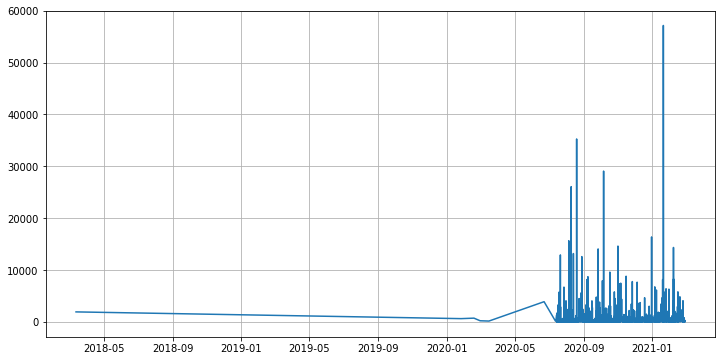

In [50]:
plt.figure(figsize=(12, 6))
plt.plot(df.hitsCount)
plt.grid(True)
plt.show()

In [51]:
# df[df.weekday == 0]

In [52]:
df.groupby(['weekday'])['id'].count().values

array([1002,  873,  786,  786,  899,  839,  953])

In [53]:
df.weekday.value_counts().values

array([1002,  953,  899,  873,  839,  786,  786])

In [54]:
df.weekday.value_counts().sort_index()

Friday       1002
Monday        873
Saturday      786
Sunday        786
Thursday      899
Tuesday       839
Wednesday     953
Name: weekday, dtype: int64

In [55]:
df.groupby(['weekday']).count()

,id,url,author,commentsCount,favoritesCount,hitsCount,isRepost,likes,subsite,title,...,author_avatar_url,symbols,words,images,videos,links,hashtags,exotic_media_type,hour,is_weekend
weekday,,,,,,,,,,,,,,,,,,,,,
Friday,1002,1002,1002,1002,1002,1002,1002,1002,1002,530,...,1002,1002,1002,1002,1002,1002,1002,1002,1002,1002
Monday,873,873,873,873,873,873,873,873,873,463,...,873,873,873,873,873,873,873,873,873,873
Saturday,786,786,786,786,786,786,786,786,786,383,...,786,786,786,786,786,786,786,786,786,786
Sunday,786,786,786,786,786,786,786,786,786,374,...,786,786,786,786,786,786,786,786,786,786
Thursday,899,899,899,899,899,899,899,899,899,456,...,899,899,899,899,899,899,899,899,899,899
Tuesday,839,839,839,839,839,839,839,839,839,447,...,839,839,839,839,839,839,839,839,839,839
Wednesday,953,953,953,953,953,953,953,953,953,469,...,953,953,953,953,953,953,953,953,953,953


<AxesSubplot:>

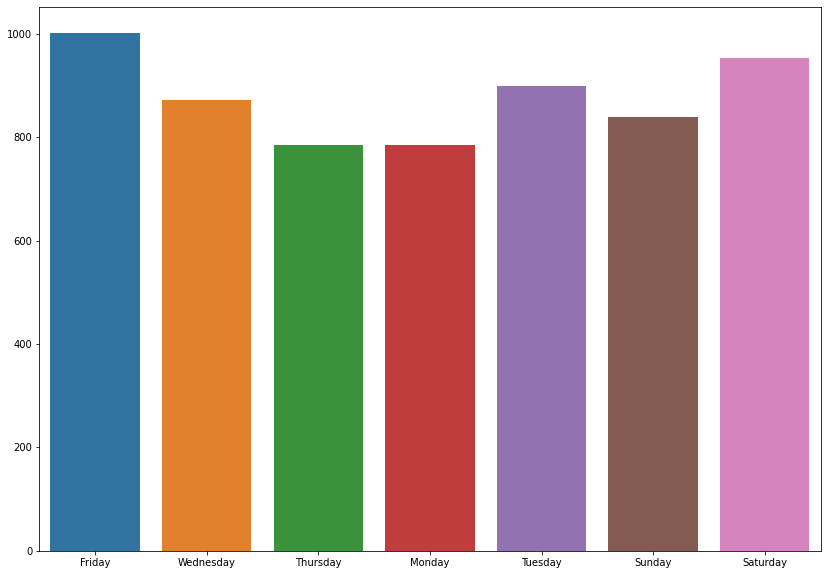

In [56]:
sns.barplot(x=df.weekday.value_counts().index, y=df.groupby(['weekday'])['id'].count().values)

In [57]:
df.reset_index(inplace=True)
df.head()

,date,id,url,author,commentsCount,favoritesCount,hitsCount,isRepost,likes,subsite,...,symbols,words,images,videos,links,hashtags,exotic_media_type,hour,weekday,is_weekend
0,2018-03-12 21:59:15,17110,https://dtf.ru/flood/17110-ne-odin-lish-tip-luny,"{'id': 4876, 'url': 'https://dtf.ru/u/4876-geo...",19,32,1946,True,36,Офтоп,...,11786,1723,42,3,0,[#long],0,21,Monday,0
1,2020-01-26 20:38:21,97215,https://dtf.ru/u/92907-aleksey-fedorov/97215-t...,"{'id': 92907, 'url': 'https://dtf.ru/u/92907-a...",11,47,648,True,56,Алексей Фёдоров,...,206,26,17,0,0,[#anime],0,20,Sunday,0
2,2020-02-18 19:11:46,104163,https://dtf.ru/u/92907-aleksey-fedorov/104163-...,"{'id': 92907, 'url': 'https://dtf.ru/u/92907-a...",39,25,740,True,49,Алексей Фёдоров,...,92,12,32,0,0,"[#anime, #evangelion]",0,19,Tuesday,0
3,2020-02-29 18:25:10,108055,https://dtf.ru/u/92907-aleksey-fedorov/108055-...,"{'id': 92907, 'url': 'https://dtf.ru/u/92907-a...",7,18,236,True,41,Алексей Фёдоров,...,150,14,19,0,1,[#anime],0,18,Saturday,0
4,2020-03-16 10:36:03,113363,https://dtf.ru/u/4810-oleg-kubaneishvili/11336...,"{'id': 4810, 'url': 'https://dtf.ru/u/4810-ole...",5,8,180,True,15,Олег Кубанеишвили,...,4728,689,17,0,0,[],0,10,Monday,0


In [58]:
df.groupby(['isRepost']).agg({'id': "count"})

,id
isRepost,
False,5440
True,698


In [59]:
df.groupby(['isRepost']).agg({'id': "count"})['id']

isRepost
False    5440
True      698
Name: id, dtype: int64

In [60]:
sns.set_theme()
sns.set_palette("husl")

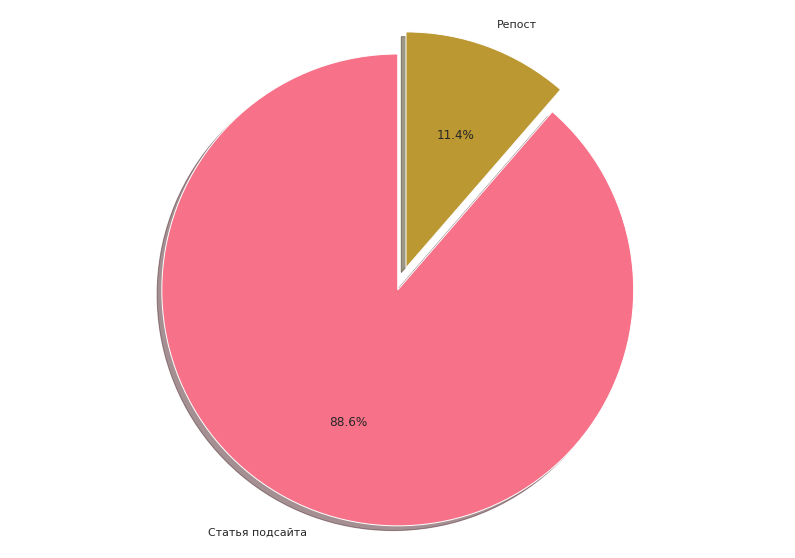

In [61]:
labels = 'Статья подсайта', 'Репост'
sizes = df.groupby(['isRepost']).agg({'id': "count"})['id'].values
explode = (0, 0.1)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

ax1.axis('equal')  
plt.show()

<AxesSubplot:xlabel='symbols'>

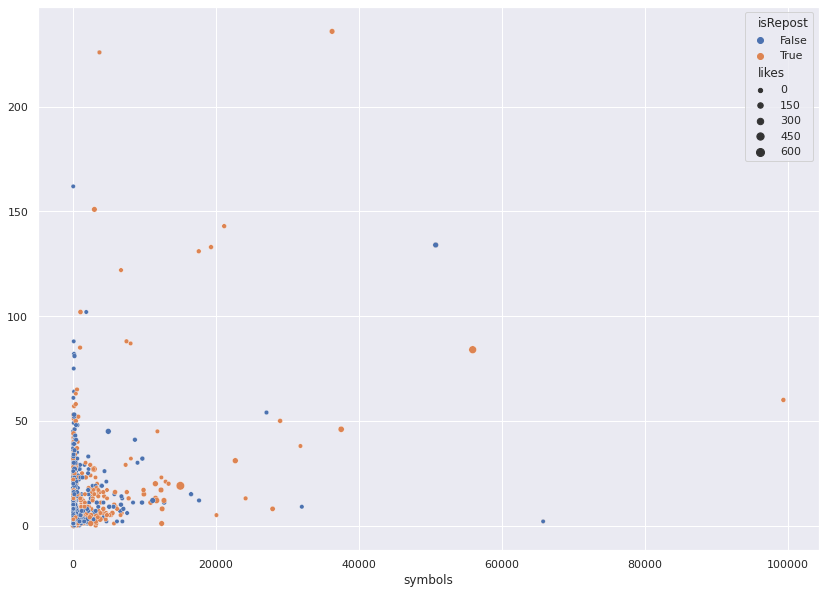

In [62]:
sns.set_theme()
sns.color_palette()

sns.scatterplot(x=df.symbols, size=df.likes, hue='isRepost', 
                y=sum([df.images, df.videos, df.links]), data=df)

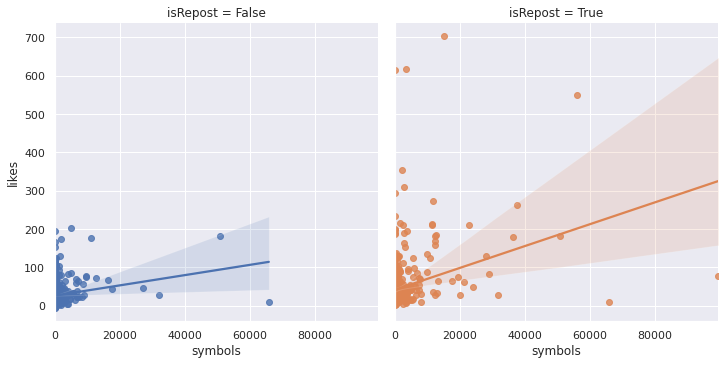

In [63]:
sns.lmplot(data=df, x='symbols', y='likes', col='isRepost', hue='isRepost')

In [64]:
sum((df.isRepost == True) / len(df.isRepost))

0.11371782339524157

In [65]:
tmp = df.groupby(['author_name'])['author_name'].count().sort_values(ascending=False).head(20)

In [66]:
tmp

author_name
Песя Олегося Гося                 748
Layben                            627
Гусь Хмурый                       470
Suzume-sama said OKawaii Koto     308
Diego Paw                         302
Фанат Ани Тейлор-Джой             270
Just No Chill                     237
Pray for Megumin                  230
Хасаги                            152
mindtered                         112
Koda                              106
Oleg Mattewho                      94
Виабу                              91
Алексей Кудрявцев                  80
Анимемания                         76
deGoose                            53
Saher                              53
Ржобек Пшеждзински                 49
Некстгенова Элой Плэйстэйшовна     49
Zerescas                           47
Name: author_name, dtype: int64

https://stackoverflow.com/questions/49820549/labeling-horizontal-barplot-with-values-in-seaborn

https://stackoverflow.com/questions/45946970/displaying-of-values-on-barchart

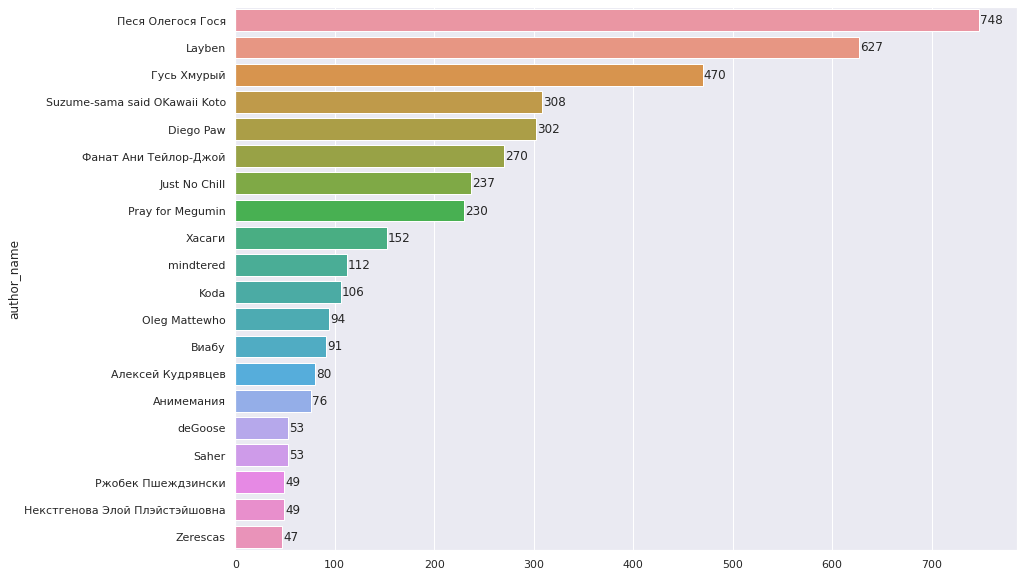

In [67]:
f = sns.barplot(x=tmp.values, y=tmp.index)
ax = f
for p in ax.patches:
    width = p.get_width()    # get bar length
    ax.text(width + 1,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.0f}'.format(width), # set variable to display, 2 decimals
            ha = 'left',   # horizontal alignment
            va = 'center')  # vertical alignment

https://stackoverflow.com/questions/61971090/how-can-i-add-images-to-bars-in-axes-matplotlib

https://stackoverflow.com/questions/40066089/apply-images-to-pyplot-python-bar-graphs

# СУПЕР_ВАЖНО!

```python
import numpy as np
import matplotlib.pyplot as plt
import requests
from io import BytesIO

labels = ['CW', 'CV', 'GW', 'SX', 'DO']
colors = ['crimson', 'dodgerblue', 'teal', 'limegreen', 'gold']
values = 30 + np.random.randint(5, 20, len(labels)).cumsum()

height = 0.9
plt.barh(y=labels, width=values, height=height, color=colors, align='center')

for i, (label, value) in enumerate(zip(labels, values)):
    # load the image corresponding to label into img
    # with cbook.get_sample_data('ada.png') as image_file:
    #    img = plt.imread(image_file)
    response = requests.get(f'https://www.countryflags.io/{label}/flat/64.png')
    img = plt.imread(BytesIO(response.content))
    plt.imshow(img, extent=[value - 8, value - 2, i - height / 2, i + height / 2], aspect='auto', zorder=2)
plt.xlim(0, max(values) * 1.05)
plt.ylim(-0.5, len(labels) - 0.5)
plt.tight_layout()
plt.show()
```

In [68]:
df.loc[:, 'author']

0       {'id': 4876, 'url': 'https://dtf.ru/u/4876-geo...
1       {'id': 92907, 'url': 'https://dtf.ru/u/92907-a...
2       {'id': 92907, 'url': 'https://dtf.ru/u/92907-a...
3       {'id': 92907, 'url': 'https://dtf.ru/u/92907-a...
4       {'id': 4810, 'url': 'https://dtf.ru/u/4810-ole...
                              ...                        
6133    {'id': 154947, 'url': 'https://dtf.ru/u/154947...
6134    {'id': 46404, 'url': 'https://dtf.ru/u/46404-o...
6135    {'id': 169967, 'url': 'https://dtf.ru/u/169967...
6136    {'id': 252726, 'url': 'https://dtf.ru/u/252726...
6137    {'id': 262818, 'url': 'https://dtf.ru/u/262818...
Name: author, Length: 6138, dtype: object

In [69]:
# df.loc[:, 'author'][6001] # для timeseries-индекса

In [70]:
df.loc[6001, 'author']

{'id': 124435,
 'url': 'https://dtf.ru/u/124435-suzume-sama-said-okawaii-koto',
 'name': 'Suzume-sama said OKawaii Koto',
 'type': 1,
 'avatar': {'type': 'image',
  'data': {'uuid': '1315d174-7208-5a30-8ccf-fa36e74ba0b0',
   'width': 650,
   'height': 651,
   'size': 59448,
   'type': 'png',
   'color': 'f270a3',
   'hash': '8484180509287270',
   'external_service': []}},
 'avatar_url': 'https://leonardo.osnova.io/1315d174-7208-5a30-8ccf-fa36e74ba0b0/',
 'is_online': False,
 'is_verified': False,
 'is_subscribed': False}

In [71]:
df.author_avatar_url

0       https://leonardo.osnova.io/57371154-8c4c-5686-...
1       https://leonardo.osnova.io/fd7e4878-7785-5d8b-...
2       https://leonardo.osnova.io/fd7e4878-7785-5d8b-...
3       https://leonardo.osnova.io/fd7e4878-7785-5d8b-...
4       https://leonardo.osnova.io/528babea-0dfc-444b-...
                              ...                        
6133    https://leonardo.osnova.io/c29d8c44-0073-48cc-...
6134    https://leonardo.osnova.io/5dded09e-5816-5b52-...
6135    https://leonardo.osnova.io/199de206-2dfc-57ee-...
6136    https://leonardo.osnova.io/9d381161-d030-561c-...
6137    https://leonardo.osnova.io/3d85a2af-3745-5c08-...
Name: author_avatar_url, Length: 6138, dtype: object

In [72]:
tmp = df.groupby(['author_avatar_url'])[['id', ]].count().sort_values(by="id", ascending=False).head(20) #\
#.count().sort_values(ascending=False).head(20)
# by="author_name"
tmp

,id
author_avatar_url,
https://leonardo.osnova.io/b6f745b6-3963-56d5-9c3c-2d6327a0dc53/,748
https://leonardo.osnova.io/7fec5e46-2507-5dcd-9d6d-06827fe1ec5b/,627
https://leonardo.osnova.io/8fd51f8a-d2eb-2130-8b66-92029cde17c1/,470
https://leonardo.osnova.io/1315d174-7208-5a30-8ccf-fa36e74ba0b0/,308
https://leonardo.osnova.io/7df667af-003c-502d-a672-56ab2918c9a4/,302
https://leonardo.osnova.io/8cc8cb1e-f454-54f3-a19f-1622a11a6cd2/,270
https://leonardo.osnova.io/199de206-2dfc-57ee-b387-1df29e145d6c/,237
https://leonardo.osnova.io/99677e0a-6adb-5b89-8177-9cd3acd32185/,230
https://leonardo.osnova.io/d1119c29-41a3-5997-96f3-628c0ee5296a/,152


In [73]:
tmp.index

Index(['https://leonardo.osnova.io/b6f745b6-3963-56d5-9c3c-2d6327a0dc53/',
       'https://leonardo.osnova.io/7fec5e46-2507-5dcd-9d6d-06827fe1ec5b/',
       'https://leonardo.osnova.io/8fd51f8a-d2eb-2130-8b66-92029cde17c1/',
       'https://leonardo.osnova.io/1315d174-7208-5a30-8ccf-fa36e74ba0b0/',
       'https://leonardo.osnova.io/7df667af-003c-502d-a672-56ab2918c9a4/',
       'https://leonardo.osnova.io/8cc8cb1e-f454-54f3-a19f-1622a11a6cd2/',
       'https://leonardo.osnova.io/199de206-2dfc-57ee-b387-1df29e145d6c/',
       'https://leonardo.osnova.io/99677e0a-6adb-5b89-8177-9cd3acd32185/',
       'https://leonardo.osnova.io/d1119c29-41a3-5997-96f3-628c0ee5296a/',
       'https://leonardo.osnova.io/a887eec3-527b-5d5f-96a2-5ab87fccb3e7/',
       'https://leonardo.osnova.io/c29d8c44-0073-48cc-10f2-7d175ab7d94c/',
       'https://leonardo.osnova.io/fe59528c-8e0d-52fc-830f-f675e2860162/',
       'https://leonardo.osnova.io/cb2d9d10-284b-5b36-b07c-659371c8f882/',
       'https://leonardo.

In [74]:
# labels
# values

# МЕГА-ВАЖНО!

https://stackoverflow.com/questions/61971090/how-can-i-add-images-to-bars-in-axes-matplotlib

https://stackoverflow.com/questions/7391945/how-do-i-read-image-data-from-a-url-in-python

In [75]:
# Первый, неудачный вариант

# import requests
# from PIL import Image
# from io import BytesIO

# labels = tmp.index[:5]
# colors = ['tan', 'peru', 'grey', 'orchid', 'darkred']
# values = tmp.values.flatten()[:5]

# height = 0.9
# plt.barh(y=tmp.index[:5], width=tmp.values.flatten()[:5], height=height, color=colors, align='center')

# for i, (label, value) in enumerate(zip(labels, values)):
#     im = Image.open(requests.get(label, stream=True).raw)
#     plt.imshow(im, extent=[value - 150, value - 20, i - height / 2.5, i + height / 2.5], aspect='auto', zorder=2)
       
    
# plt.xlim(0, max(values) * 1.05)
# plt.ylim(-0.5, len(labels) - 0.5)
# plt.tight_layout()
# plt.show()

https://stackoverflow.com/questions/32059397/pandas-groupby-without-turning-grouped-by-column-into-index

In [76]:
tmp_2 = df.groupby(['author_name','author_avatar_url'], as_index=False).count() \
.sort_values(by="id", ascending=False).head(20).iloc[:, [0,1,3]]
tmp_2

,author_name,author_avatar_url,id
341,Песя Олегося Гося,https://leonardo.osnova.io/b6f745b6-3963-56d5-...,748
105,Layben,https://leonardo.osnova.io/7fec5e46-2507-5dcd-...,627
276,Гусь Хмурый,https://leonardo.osnova.io/8fd51f8a-d2eb-2130-...,470
172,Suzume-sama said OKawaii Koto,https://leonardo.osnova.io/1315d174-7208-5a30-...,308
47,Diego Paw,https://leonardo.osnova.io/7df667af-003c-502d-...,302
368,Фанат Ани Тейлор-Джой,https://leonardo.osnova.io/8cc8cb1e-f454-54f3-...,270
91,Just No Chill,https://leonardo.osnova.io/199de206-2dfc-57ee-...,237
142,Pray for Megumin,https://leonardo.osnova.io/99677e0a-6adb-5b89-...,230
371,Хасаги,https://leonardo.osnova.io/d1119c29-41a3-5997-...,152
208,mindtered,https://leonardo.osnova.io/a887eec3-527b-5d5f-...,112


In [77]:
tmp_2.author_name

341                 Песя Олегося Гося
105                            Layben
276                       Гусь Хмурый
172     Suzume-sama said OKawaii Koto
47                          Diego Paw
368             Фанат Ани Тейлор-Джой
91                      Just No Chill
142                  Pray for Megumin
371                            Хасаги
208                         mindtered
102                              Koda
137                     Oleg Mattewho
260                             Виабу
233                 Алексей Кудрявцев
246                        Анимемания
152                             Saher
199                           deGoose
330    Некстгенова Элой Плэйстэйшовна
353                Ржобек Пшеждзински
189                          Zerescas
Name: author_name, dtype: object

In [78]:
tmp_2.id[:5][::-1]

47     302
172    308
276    470
105    627
341    748
Name: id, dtype: int64

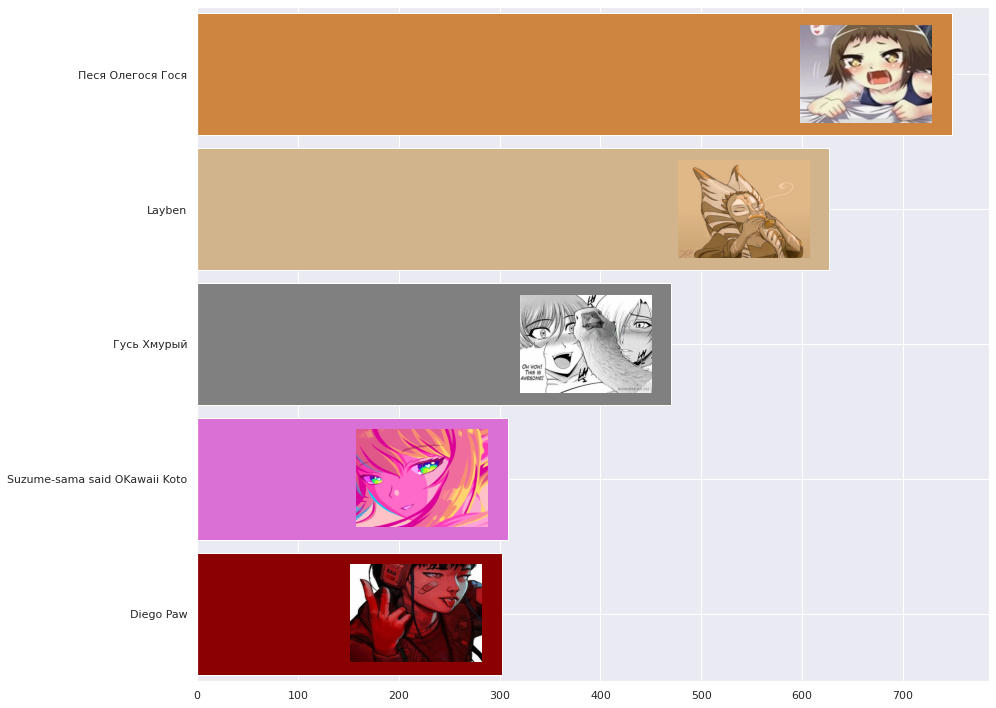

In [79]:
import requests
from PIL import Image
from io import BytesIO

labels = tmp_2.author_avatar_url[:5][::-1]
colors = ['peru', 'tan', 'grey', 'orchid', 'darkred'][::-1]
values = tmp_2.id[:5][::-1] #.flatten()[:5]

height = 0.9
plt.barh(y=tmp_2.author_name[:5][::-1], width=tmp_2.id[:5][::-1], height=height, color=colors, align='center')

for i, (label, value) in enumerate(zip(labels, values)):
    im = Image.open(requests.get(label, stream=True).raw)
    plt.imshow(im, extent=[value - 150, value - 20, i - height / 2.5, i + height / 2.5], aspect='auto', zorder=2)

    
plt.xlim(0, max(values) * 1.05)
plt.ylim(-0.5, len(labels) - 0.5)
plt.tight_layout()
plt.show()

In [80]:
ax.patches

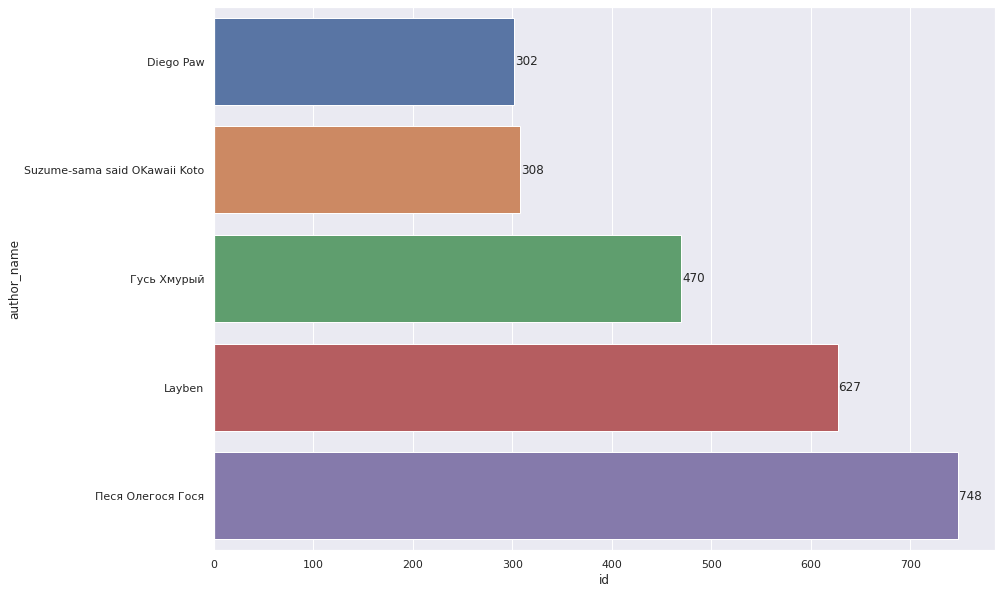

In [81]:
labels = tmp_2.author_avatar_url[:5][::-1]
colors = ['peru', 'tan', 'grey', 'orchid', 'darkred'][::-1]
values = tmp_2.id[:5][::-1] #.flatten()[:5]

height = 0.9
f = sns.barplot(y=tmp_2.author_name[:5][::-1], x=tmp_2.id[:5][::-1])
ax = f

for p in ax.patches:
    width = p.get_width()    # get bar length
    ax.text(width + 1,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.0f}'.format(width), # set variable to display, 2 decimals
            ha = 'left',   # horizontal alignment
            va = 'center')  # vertical alignment

# for i, (label, value) in enumerate(zip(labels, values)):
#     im = Image.open(requests.get(label, stream=True).raw)
#     plt.imshow(im, extent=[value - 150, value - 20, i - height / 2.5, i + height / 2.5], aspect='auto', zorder=2)
       
    
# plt.xlim(0, max(values) * 1.05)
# plt.ylim(-0.5, len(labels) - 0.5)
# plt.tight_layout()
# plt.show()

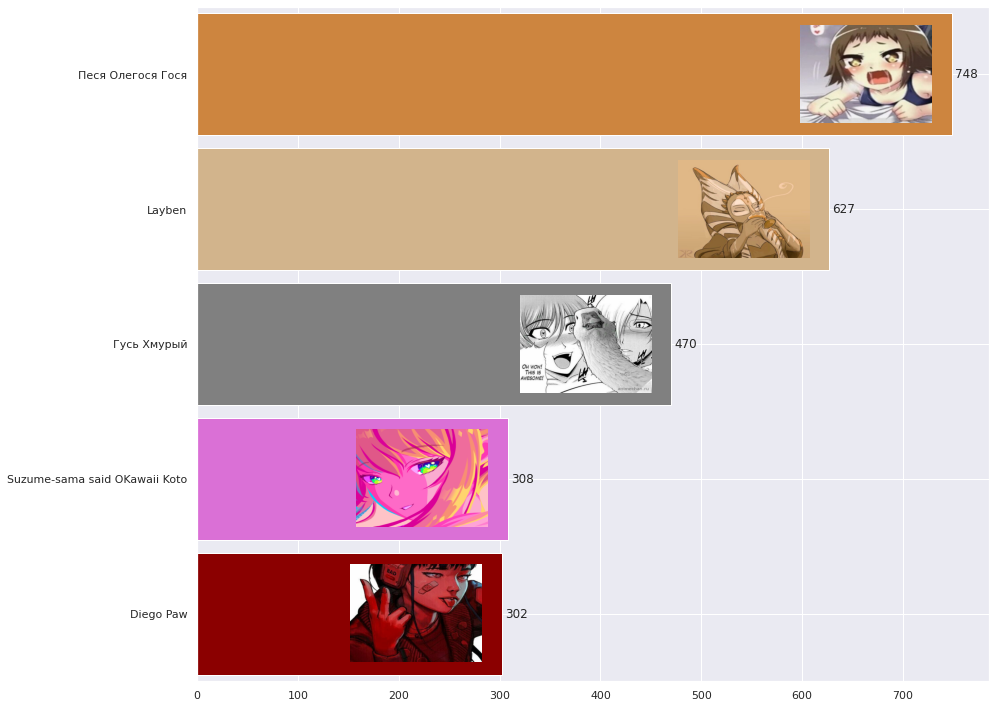

In [82]:
import requests
from PIL import Image
from io import BytesIO

labels = tmp_2.author_avatar_url[:5][::-1]
colors = ['peru', 'tan', 'grey', 'orchid', 'darkred'][::-1]
values = tmp_2.id[:5][::-1] 

height = 0.9
plt.barh(y=tmp_2.author_name[:5][::-1], width=tmp_2.id[:5][::-1], height=height, color=colors, align='center')

for i, (label, value) in enumerate(zip(labels, values)):
    im = Image.open(requests.get(label, stream=True).raw)
    plt.imshow(im, extent=[value - 150, value - 20, i - height / 2.5, i + height / 2.5], aspect='auto', zorder=2)
    plt.text(value + 3, i, '{:1.0f}'.format(value), ha = 'left', va = 'center')

    
plt.xlim(0, max(values) * 1.05)
plt.ylim(-0.5, len(labels) - 0.5)
plt.tight_layout()
plt.show()

In [83]:
df.groupby(['author_name']).agg({'id': 'count', 'likes': ['max', 'sum']}).sort_values(by=("id",'count'), ascending=False)

id likes       
                              count   max    sum
author_name                                     
Песя Олегося Гося               748   130  21862
Layben                          627    90  12403
Гусь Хмурый                     470    99  13566
Suzume-sama said OKawaii Koto   308   114  11285
Diego Paw                       302   123   6813
...                             ...   ...    ...
Vladislav Hollow                  1    28     28
Wilfred                           1   123    123
Yuriy                             1   169    169
Zhenya Pavlov                     1    16     16
💱                                 1    10     10

[383 rows x 3 columns]

In [84]:
df.columns

Index(['date', 'id', 'url', 'author', 'commentsCount', 'favoritesCount',
       'hitsCount', 'isRepost', 'likes', 'subsite', 'title', 'type', 'blocks',
       'repost', 'stackedRepostsAuthors', 'media_content_types', 'author_name',
       'author_type', 'author_avatar_url', 'symbols', 'words', 'images',
       'videos', 'links', 'hashtags', 'exotic_media_type', 'hour', 'weekday',
       'is_weekend'],
      dtype='object')

<AxesSubplot:>

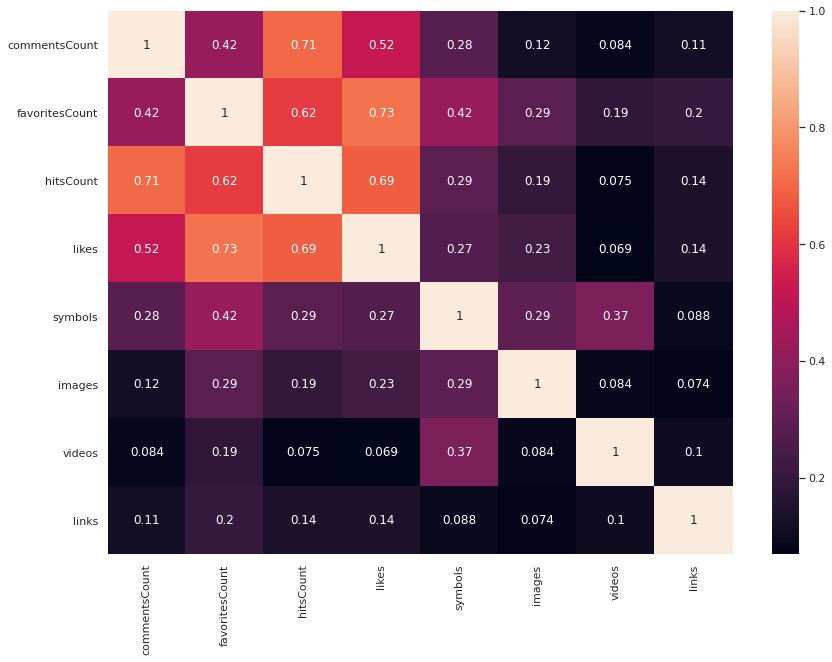

In [85]:
sns.heatmap(df.loc[:, ['commentsCount', 'favoritesCount', 'hitsCount', 
                       'likes', 'symbols', 'images', 'videos', 'links']].corr(), annot=True)

In [86]:
df.groupby(['author_name', 'isRepost']).agg({'id': 'count', 'likes': ['max', 'sum']}).sort_values(by=("id",'count'), ascending=False)

id likes       
                                      count   max    sum
author_name                  isRepost                   
Песя Олегося Гося            False      737   130  21485
Layben                       False      621    90  12230
Гусь Хмурый                  False      466    99  13349
Diego Paw                    False      287   123   6494
Фанат Ани Тейлор-Джой        False      251   153   5746
...                                     ...   ...    ...
Артём Хромов                 False        1    37     37
Артём Чуйкин                 False        1    38     38
                             True         1    21     21
Бабайечка Клоунесса DTF мира True         1    66     66
💱                            False        1    10     10

[469 rows x 3 columns]

<AxesSubplot:xlabel='symbols'>

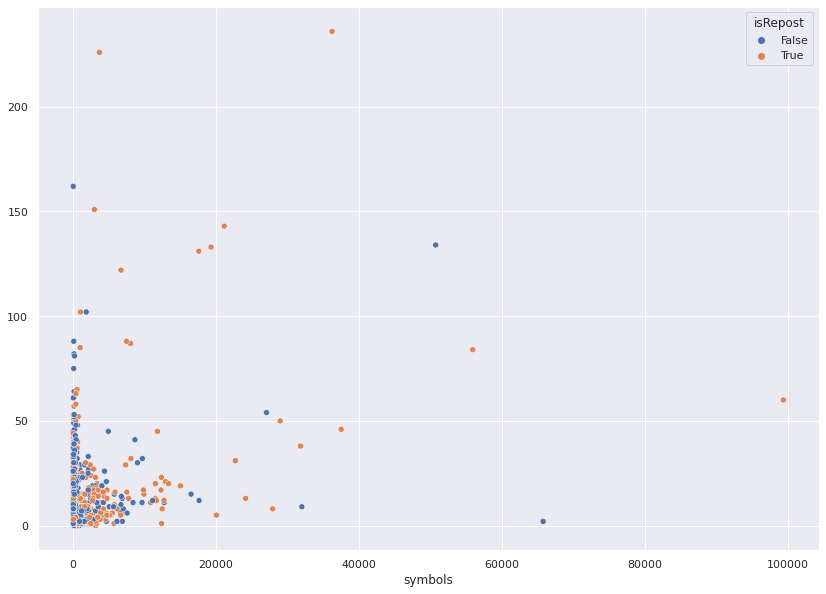

In [87]:
sns.scatterplot(x=df.symbols, y=sum([df.images, df.videos, df.links]), hue='isRepost', data=df)

<AxesSubplot:xlabel='commentsCount', ylabel='Count'>

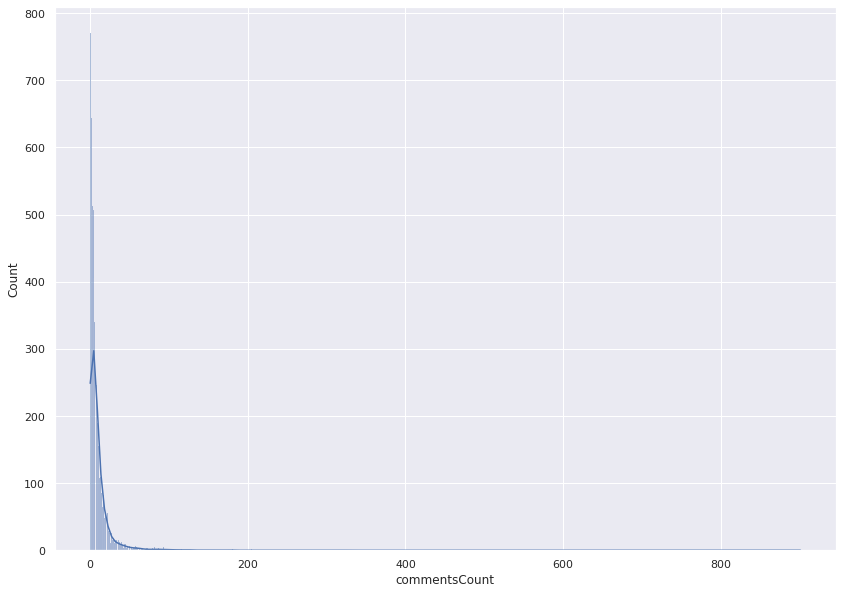

In [128]:
sns.histplot(x = df.commentsCount, kde=True)

<AxesSubplot:xlabel='hitsCount', ylabel='Count'>

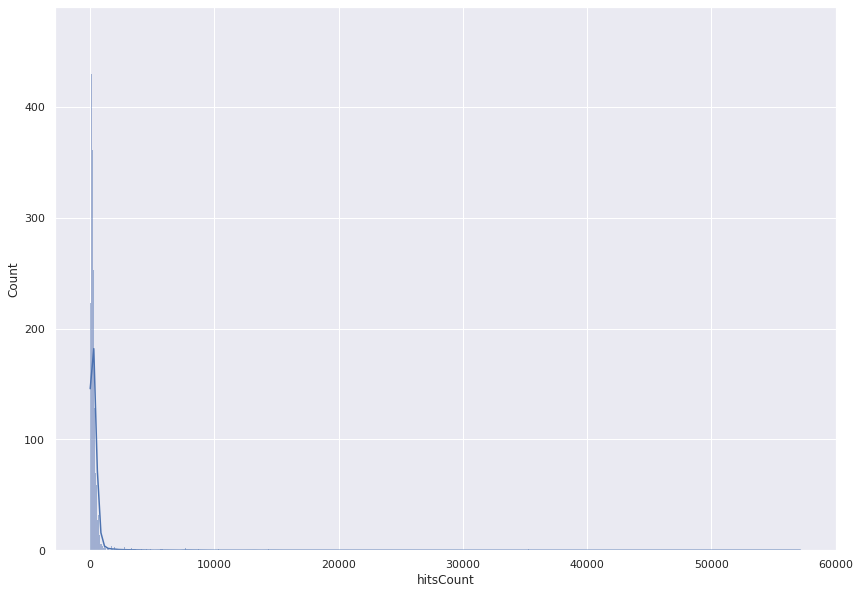

In [107]:
sns.histplot(df.hitsCount, kde=True)

<AxesSubplot:xlabel='likes', ylabel='Count'>

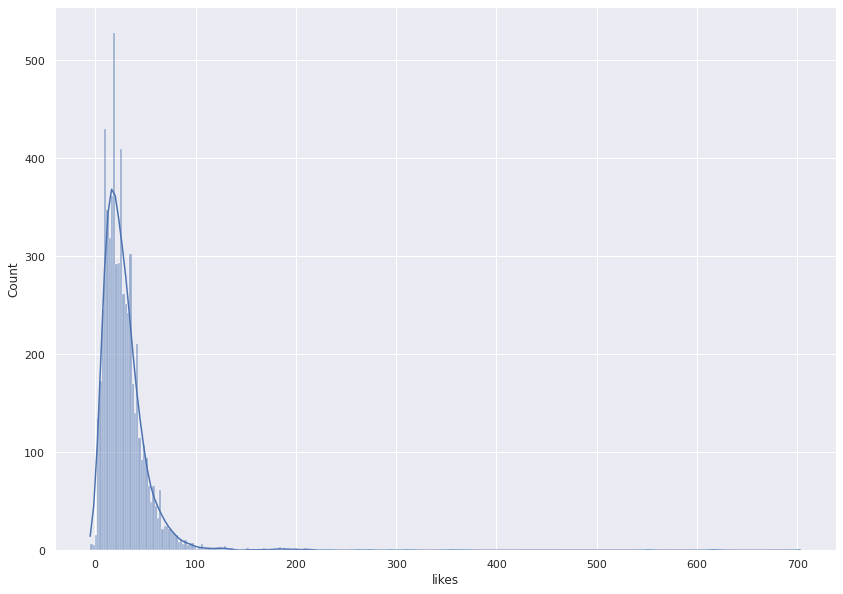

In [125]:
sns.histplot(df.likes, kde=True)

<AxesSubplot:xlabel='isRepost', ylabel='likes'>

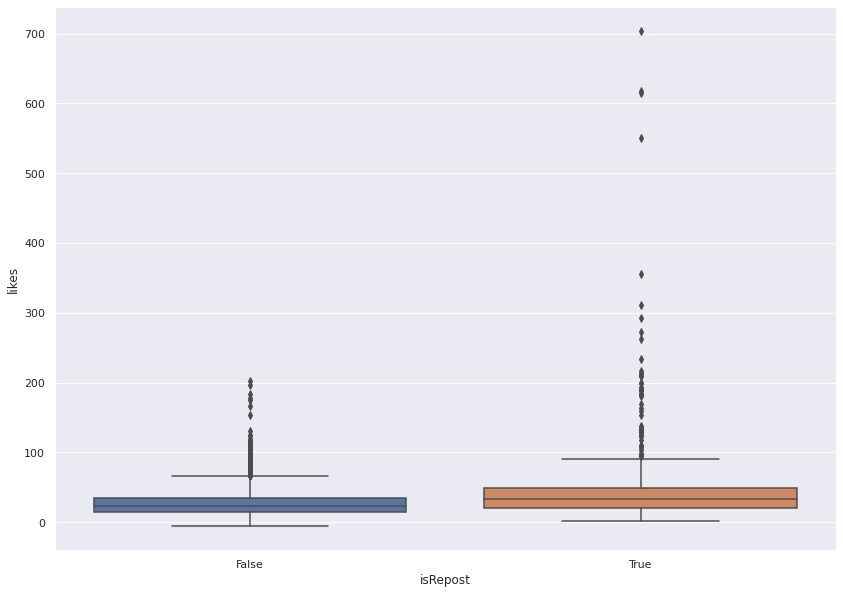

In [90]:
sns.boxplot(data=df, x="isRepost", y="likes")

In [91]:
a = df.groupby(['author_name']).agg({'id': 'count'})
a[a['id'] > 1].sort_values(by='id', ascending=False)

,id
author_name,
Песя Олегося Гося,748
Layben,627
Гусь Хмурый,470
Suzume-sama said OKawaii Koto,308
Diego Paw,302
...,...
Максим Мерзликин,2
Gacha Hell,2
Марк Вольский,2


In [92]:
a[a['id'] > 100].index

Index(['Diego Paw', 'Just No Chill', 'Koda', 'Layben', 'Pray for Megumin',
       'Suzume-sama said OKawaii Koto', 'mindtered', 'Гусь Хмурый',
       'Песя Олегося Гося', 'Фанат Ани Тейлор-Джой', 'Хасаги'],
      dtype='object', name='author_name')

In [93]:
tmp = df.groupby(['author_name']).agg({'id': 'count'})

In [94]:
# sns.boxplot(data=df, y="author_name", x="likes")

<AxesSubplot:ylabel='likes'>

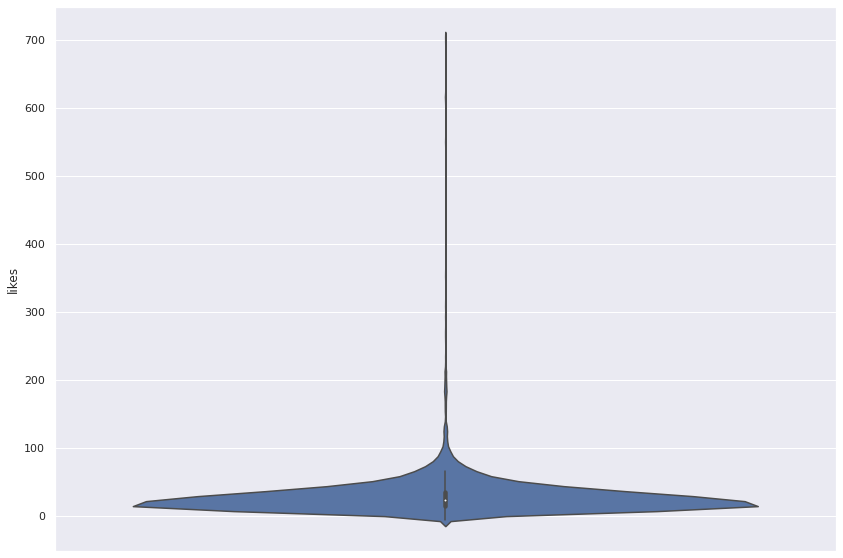

In [95]:
sns.violinplot(y=df.likes)

In [96]:
from plotnine import *
from plotnine.data import *

https://plotnine.readthedocs.io/en/stable/generated/plotnine.geoms.geom_violin.html?highlight=violin#violins-boxes-points-and-lines

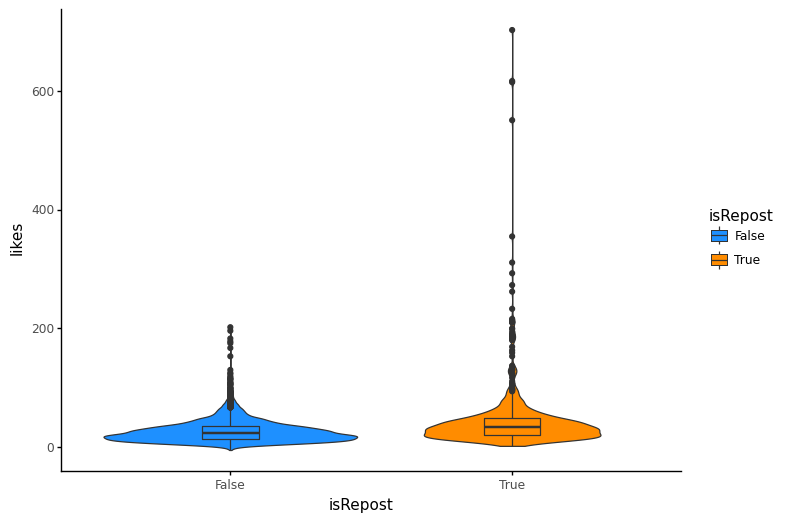

<ggplot: (8752979896037)>

In [97]:
(ggplot(df, aes(x=df.isRepost, y=df.likes, fill=df.isRepost)) + geom_violin(show_legend=False) + geom_boxplot(width = .2)
+ scale_fill_manual(values=['dodgerblue', 'darkorange'])
+ theme_classic()
+ theme(figure_size=(8, 6))
)

In [98]:
subs = pd.read_csv(PATH + "data_test_subs_jp.csv", index_col=0)
subs

,id,url,author,badges,commentsCount,commentsSeenCount,favoritesCount,cover,date,dateRFC,...,is_show_thanks,is_still_updating,is_filled_by_editors,isEditorial,audioUrl,hotness,commentEditor,summarize,repost,stackedRepostsAuthors
0,655467,https://dtf.ru/s/japan/655467-bolshe-gasyapono...,"{'id': 27850, 'url': 'https://dtf.ru/u/27850-d...","[{'type': 'top', 'text': 'Япония', 'background...",2,NaN,5,"{'additionalData': {'size': 576727, 'type': 'j...",1614351266,"Fri, 26 Feb 2021 17:54:26 +0300",...,False,False,False,False,NaN,0,{'enabled': True},Bandai Namco’s Gashapon Department Store в Ике...,NaN,NaN
1,653734,https://dtf.ru/s/japan/653734-festival-fudzi-s...,"{'id': 27850, 'url': 'https://dtf.ru/u/27850-d...","[{'type': 'top', 'text': 'Япония', 'background...",1,NaN,6,"{'additionalData': {'size': 534138, 'type': 'j...",1614265081,"Thu, 25 Feb 2021 17:58:01 +0300",...,False,False,False,False,NaN,0,{'enabled': True},40 минут на автобусе от станции Кавагутико на ...,NaN,NaN
2,650909,https://dtf.ru/s/travel/650909-10-potryasayush...,"{'id': 329335, 'url': 'https://dtf.ru/s/travel...","[{'type': 'top', 'text': 'Путешествия', 'backg...",5,NaN,18,"{'additionalData': {'size': 182666, 'type': 'j...",1613986578,"Mon, 22 Feb 2021 12:36:18 +0300",...,False,False,False,False,NaN,0,{'enabled': True},Музей открыт ежедневно и находится в постройке...,"{'author': {'id': 300374, 'url': 'https://dtf....",[]
3,651835,https://dtf.ru/s/weaboo/651835-some-japan,"{'id': 124435, 'url': 'https://dtf.ru/u/124435...","[{'type': 'top', 'text': 'Виабу', 'background'...",9,NaN,14,"{'additionalData': {'size': 1351208, 'type': '...",1614061795,"Tue, 23 Feb 2021 09:29:55 +0300",...,False,False,False,False,NaN,0,{'enabled': True},"Адрес: 605-4 Mawatari Onuma, Хитачинака 312-00...","{'author': {'id': 300374, 'url': 'https://dtf....",[]
4,646467,https://dtf.ru/u/286845-digo/646467,"{'id': 286845, 'url': 'https://dtf.ru/u/286845...","[{'type': 'top', 'text': 'Digo', 'background':...",19,NaN,15,"{'additionalData': {'size': 890999, 'type': 'j...",1613630419,"Thu, 18 Feb 2021 09:40:19 +0300",...,False,False,False,False,NaN,0,{'enabled': True},#наэтотразбезhorny #фотография #япония #токио,"{'author': {'id': 300374, 'url': 'https://dtf....",[]
0,645864,https://dtf.ru/s/japan/645864-sady-hamarikyu,"{'id': 27850, 'url': 'https://dtf.ru/u/27850-d...","[{'type': 'top', 'text': 'Япония', 'background...",0,NaN,13,"{'additionalData': {'size': 283350, 'type': 'j...",1613578168,"Wed, 17 Feb 2021 19:09:28 +0300",...,False,False,False,False,NaN,0,{'enabled': True},Токийский залив обеспечивает соленой водой ров...,NaN,NaN
1,634735,https://dtf.ru/anime/634735-v-anime-devushka-n...,"{'id': 256351, 'url': 'https://dtf.ru/crunchyr...","[{'type': 'top', 'text': 'Аниме', 'background'...",945,NaN,793,"{'additionalData': {'size': 86706, 'type': 'jp...",1613495808,"Tue, 16 Feb 2021 20:16:48 +0300",...,False,False,False,False,https://leonardo.osnova.io/audio/a6cb09cd-a825...,0,{'enabled': True},"То, что происходит в Японии, происходит и в др...","{'author': {'id': 300374, 'url': 'https://dtf....",[]
2,641673,https://dtf.ru/life/641673-v-yaponii-naznachen...,"{'id': 22393, 'url': 'https://dtf.ru/u/22393-s...","[{'type': 'top', 'text': 'Жизнь', 'background'...",292,NaN,86,"{'additionalData': {'size': 62267, 'type': 'gi...",1613242692,"Sat, 13 Feb 2021 21:58:12 +0300",...,False,False,False,False,NaN,0,{'enabled': True},В Японии министра по региональному развитию Тэ...,"{'author': {'id': 300374, 'url': 'https://dtf....",[]
3,641437,https://dtf.ru/flood/641437-v-yaponii-zemletry...,"{'id': 314019, 'url': 'https://dtf.ru/u/314019...","[{'type': 'top', 'text': 'Офтоп', 'background'...",63,NaN,18,NaN,1613228476,"Sat, 13 Feb 2021 18:01:16 +0300",...,False,False,False,False,NaN,0,{'enabled': True},NaN,"{'author': {'id': 300374, 'url': 'https://dtf....",[]
4,641304,https://dtf.ru/s/japan/641304-sovety-turistu-c...,"{'id': 27850, 'url': 'https://dtf.ru/u/27850-d...","[{'type': 'top', 'text': 'Япония', 'b

In [99]:
subs.title

0                      Больше гасяпонов богу гасяпонов
1                          Фестиваль Фудзи Сиба-сакура
2    10 потрясающих музеев, посвященных еде и напиткам
3                                          _some:Japan
4                                                  NaN
0                                        Сады Хамарикю
1    В аниме «Девушка напрокат» парень платит девуш...
2       В Японии назначен министр по делам одиночества
3          В Японии землетрясение магнитудой 7,2 балла
4    Советы туристу: что взять в Японию в разные се...
0                Бамбуковый лес Сагано в Киото, Япония
1                     Национальный парк Хитачи, Япония
2                                         Это не аниме
3                                                  NaN
4    ( ͡° ͜ʖ ͡°) Интересный музей в префектуре Тоти...
Name: title, dtype: object

In [100]:
# df['author_avatar_url'] = df['author'].apply(lambda x: x.get('avatar_url'))
# df